# Telco customer churn analysis

<img src="https://img.etimg.com/thumb/msid-79149912,width-650,imgsize-637023,,resizemode-4,quality-100/data.jpg" />

<br>
<br>
<hr class="dotted">
<br>
<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams

# EDA - exploratory data analysis
Reading and understanding the data

In [2]:
churn = pd.read_csv(r'C:\Users\Natalie\Downloads\churn.csv')

The Problem - what are we going to predict? <br>
Predict customer churn

What data is available for that?
 * Churn data set of clients and data (features) about the clients
 * Demographic information (gender, senior citizen, partner, etc)
 * Account information: seniority, charges, etc
 * Service information: phone lines, tech support, etc


What can be the motivation and applications of solving the problem? <br> 
Predicting churn of a telecom company can help with customer retention, since it is imperative to maintain the current clientele and not just rely on new customers. <br> 
Knowing which parameters correlate with customer churn will assist n reducing the curn rate.

In [3]:
# How many examples are in the dataset?
# How many features?
churn.shape

(7043, 21)

In [4]:
#Take a look at the data:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


We have 7043 examples and 21 columns (20 features\variables and one label)


# Data Cleaning

In [5]:
# See columns
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Rename columns to lower letters

In [6]:
churn = churn.rename(columns=str.lower)

Checking whether the column names have changed

In [7]:
churn.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

The data type of DataFrame

In [8]:
churn.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Check for duplicate rows 

In [9]:
churn.duplicated().sum()

0

In [10]:
#See data types in columns and how many options in each column [unique values]
for column in churn.columns:
    print('Column: {} - Unique Values: {}'.format(column, churn[column].unique()))

Column: customerid - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: seniorcitizen - Unique Values: [0 1]
Column: partner - Unique Values: ['Yes' 'No']
Column: dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: phoneservice - Unique Values: ['No' 'Yes']
Column: multiplelines - Unique Values: ['No phone service' 'No' 'Yes']
Column: internetservice - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: onlinesecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: onlinebackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: deviceprotection - Unique Values: ['No' 'Yes' 'No internet service']
Column: techsuppor

The customerid column is useless to explain whether not the customer will churn. <br>
Therefore, we drop this column from the data set.

In [11]:
# drop the customerID column from the dataset
churn.drop(columns='customerid', inplace=True)

We observe that the column totalcharges was wrongly detected as an object. <br> 
This column represents the total amount charged to the customer and it is, therefore, a numeric variable. <br> 
For further analysis, we need to transform this column into a numeric data type.

In [12]:
# transform the column totalCharges into a numeric data type
churn['totalcharges'] = pd.to_numeric(churn['totalcharges'], errors='coerce')

In [13]:
churn.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

In [14]:
churn.isnull().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [15]:
# null observations of the TotalCharges column
churn[churn['totalcharges'].isnull()]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


These observations have also a tenure of 0. <br>
This information appeared to be contradictory, and therefore, we decided to remove those observations from the data set.

In [16]:
# drop observations with null values
churn.dropna(inplace=True)

In [17]:
churn.isnull().sum()
#No more NULL values!

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [18]:
churn.isna().mean()

gender              0.0
seniorcitizen       0.0
partner             0.0
dependents          0.0
tenure              0.0
phoneservice        0.0
multiplelines       0.0
internetservice     0.0
onlinesecurity      0.0
onlinebackup        0.0
deviceprotection    0.0
techsupport         0.0
streamingtv         0.0
streamingmovies     0.0
contract            0.0
paperlessbilling    0.0
paymentmethod       0.0
monthlycharges      0.0
totalcharges        0.0
churn               0.0
dtype: float64

In [19]:
#churn.reset_index(inplace = True)
churn.reset_index(drop=True, inplace=True)

In [20]:
churn.shape

(7032, 20)

<br>

#### Feature description
 
(1) Demographic Information

<table>
    <tr><th> Gender </th><td> Whether the client is a female or a male </td></tr>
    <tr><th> Seniorcitizen </th><td> Whether the client is a senior citizen or not </td></tr>
    <tr><th> Partner </th><td> Whether the client has a partner or not </td></tr>
    <tr><th> Dependents </th><td> Whether the client has dependents or not </td></tr>
<table>    

(2) Customer Account Information 

<table>   
    <tr><th> Tenure </th><td> Number of months the customer has stayed with the company </td></tr>
    <tr><th> Contract </th><td> Indicates the customer’s current contract type (monthly/yearly/two-year)</td></tr>
    <tr><th> Paperlessbilling </th><td> Whether the client has paperless billing or not </td></tr>
    <tr><th> Paymentmethod </th><td> The customer’s payment method (check/electronic bill/etc)</td></tr>
    <tr><th> Monthlycharges </th><td> The amount charged to the customer monthly </td></tr>
    <tr><th> Totalcharges </th><td> The total amount charged to the customer </td></tr>
<table>
    
(3) Services Information    
    
<table>    
    <tr><th> Phoneservice </th><td> Whether the client has a phone service or not  </td></tr>
    <tr><th> Multiplelines </th><td> Whether the client has multiple lines or not  </td></tr>
    <tr><th> Internetservice </th><td> Whether the client is subscribed to Internet service with the company  </td></tr>
    <tr><th> Onlinesecurity </th><td> Whether the client has online security or not  </td></tr>
    <tr><th> Onlinebackup </th><td> Whether the client has online backup or not  </td></tr>
    <tr><th> Deviceprotection </th><td> Whether the client has device protection or not  </td></tr>
    <tr><th> Techsupport </th><td> Whether the client has tech support or not </td></tr>
    <tr><th> Streamingtv </th><td> Whether the client has streaming TV or not </td></tr>
    <tr><th> Streamingmovies </th><td> Whether the client has streaming movies or not </td></tr>
</table>

<br>
<br>
<hr class="dotted">
<br>
<br>

## Data visualization and finding interesting relationships

#### Distributon of the label:

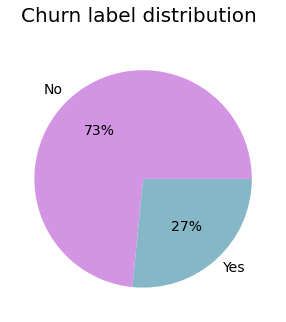

In [21]:
fig = plt.figure(figsize=(5, 5)) 
churn.churn.value_counts(normalize=True).plot(kind='pie',y = churn.churn.value_counts(normalize = True), autopct='%1.0f%%', colors = ['#D395E3','#86B7C6'],textprops = {'fontsize': 14})
plt.suptitle('Churn label distribution',fontsize=20)
plt.axis('off')
plt.show()

~27% of the company's customers churned [left the company]

#### Payment method

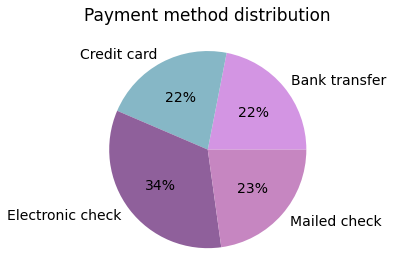

In [22]:
## Payment method
SumPayment = churn.groupby('paymentmethod')['paymentmethod'].count()

# show absolute values in 'PaymentMethod' groups
total = int(np.sum(churn['paymentmethod'].count()))
axlabels = ["Bank transfer", "Credit card", "Electronic check", "Mailed check"]
fig, ax = plt.subplots()
ax.pie(SumPayment, labels=axlabels, autopct='%1.f%%',colors=['#D395E3','#86B7C6','#8F609B','#C686C1'],textprops = {'fontsize': 14})
plt.title('Payment method distribution',fontsize=17)
plt.tight_layout()
plt.show()

#### Histograms for features with numerical data

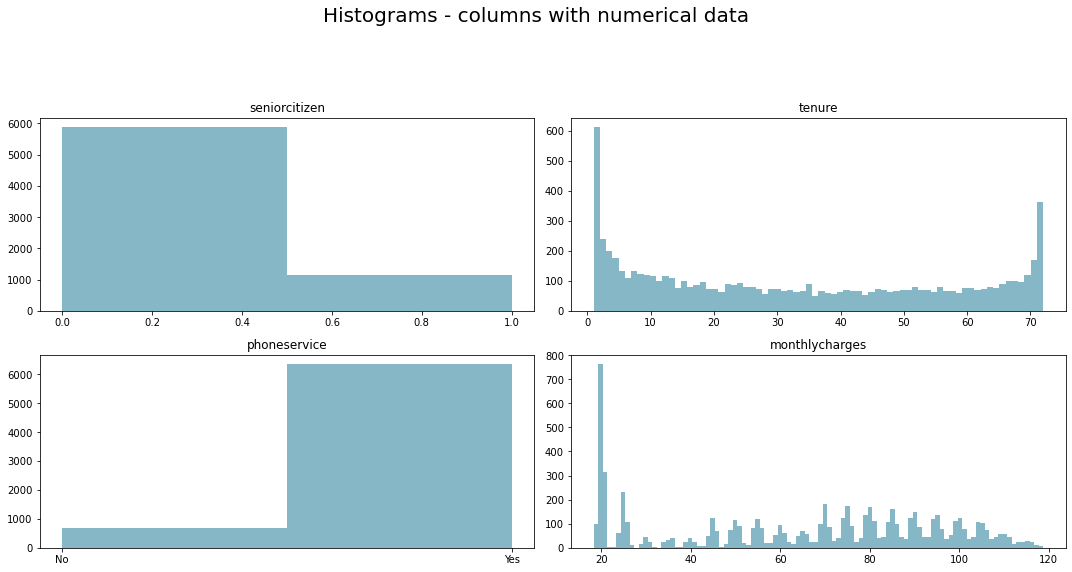

In [23]:
# HISTOGRAMS FOR COLUMNS WITH NUMERICAL DATA
fig1 = plt.figure(1, figsize=(15, 15))
histograms = churn[['seniorcitizen','tenure', 'phoneservice', 'monthlycharges']]   
plt.suptitle('Histograms - columns with numerical data\n', \
                 horizontalalignment="center",fontstyle = "normal", \
                 fontsize = 20)

for i in range(histograms.shape[1]):
    plt.subplot(4, 2, i + 1)
    k = plt.gca()
    k.set_title(histograms.columns.values[i])
    vals = np.size(histograms.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(histograms.iloc[:, i], bins=vals, color = '#86B7C6')
    ax.set_facecolor("white") 
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Service info visualization

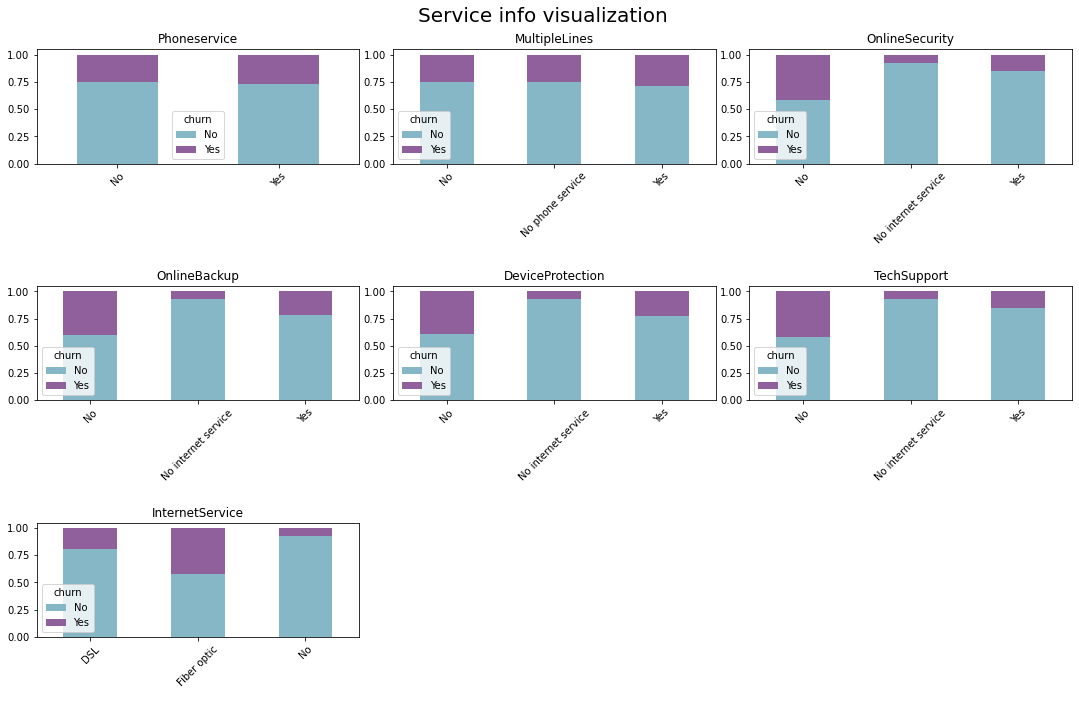

In [24]:
ax= plt.subplot(331)
plt.title('Phoneservice')
pd.crosstab(churn['phoneservice'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (15,10),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

ax= plt.subplot(332)
plt.title('MultipleLines')
pd.crosstab(churn['multiplelines'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (15,10),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

ax= plt.subplot(333)
plt.title('OnlineSecurity')
pd.crosstab(churn['onlinesecurity'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (15,10),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

ax= plt.subplot(334)
plt.title('OnlineBackup')
pd.crosstab(churn['onlinebackup'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (15,10),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

ax= plt.subplot(335)
plt.title('DeviceProtection')
pd.crosstab(churn['deviceprotection'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (15,10),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

ax= plt.subplot(336)
plt.title('TechSupport')
pd.crosstab(churn['techsupport'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (15,10),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

ax= plt.subplot(337)
plt.title('InternetService')
pd.crosstab(churn['internetservice'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (15,10),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

plt.suptitle("Service info visualization",fontsize=20)

plt.tight_layout()

#### CONCLUSIONS:
* Having no online security, device security, tech support and online backup with the internet service might cause a higher churn rate
* Having fiber optic internet might cause higher churn rates

### Demopgraphic info visualization 

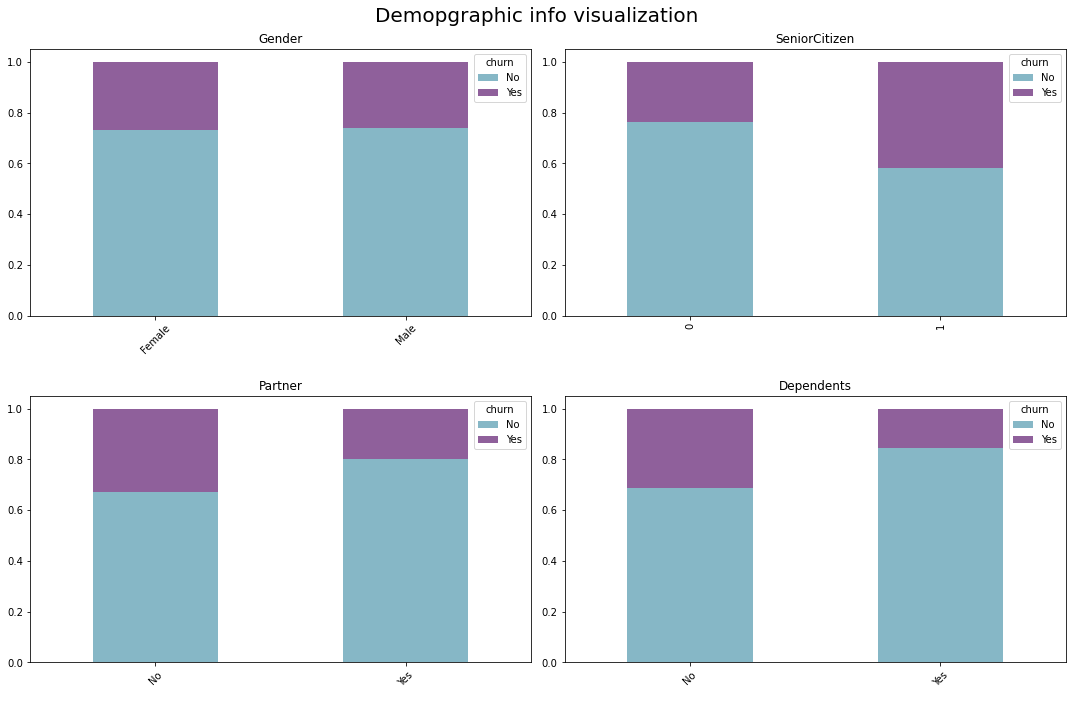

In [25]:
ax= plt.subplot(221)
plt.title('Gender')
pd.crosstab(churn['gender'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (15,10),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

ax= plt.subplot(222)
plt.title('SeniorCitizen')
pd.crosstab(churn['seniorcitizen'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (15,10),color=['#86B7C6','#8F609B'])
plt.xlabel("  ")

ax= plt.subplot(223)
plt.title('Partner')
pd.crosstab(churn['partner'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (15,10),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

ax= plt.subplot(224)
plt.title('Dependents')
pd.crosstab(churn['dependents'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (15,10),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

plt.suptitle("Demopgraphic info visualization",fontsize=20)

plt.tight_layout()

#### Conclusions:
* Gender likely doesn't affect churn rates
* Senior citizens have higher churn rates
* Clients without a partner have a higher churn rate
* Clients without dependendents have higher churn rates

### Account info - billing

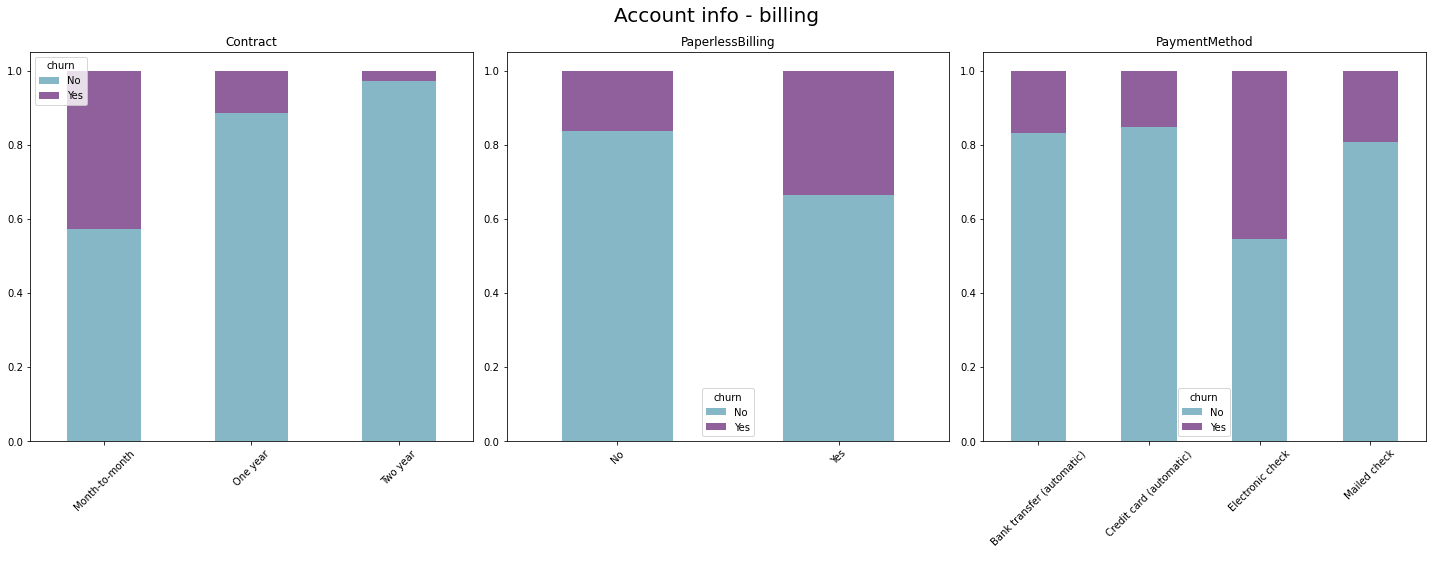

In [26]:
ax= plt.subplot(131)
plt.title('Contract')
pd.crosstab(churn['contract'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (20,8),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

ax= plt.subplot(132)
plt.title('PaperlessBilling')
pd.crosstab(churn['paperlessbilling'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (20,8),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

ax= plt.subplot(133)
plt.title('PaymentMethod')
pd.crosstab(churn['paymentmethod'],churn['churn'],normalize='index').plot.bar(stacked=True,ax=ax,figsize = (20,8),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel("  ")

plt.suptitle("Account info - billing",fontsize=20)
plt.tight_layout()

#### Conclusions: 
* Clients with month to month billing have higher churn rates - longer contract equals lower risk to churn
* Clients with papaerless billing have higher churn rates
* Electronic check - higher churn rate (not automatic)

# Correlations

In machine learning, we are interested in evaluating the degree of dependency between each independent variable and the response variable. <br>
Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target.<br>

The following code computes the mutual information score between each categorical variable of the data set.

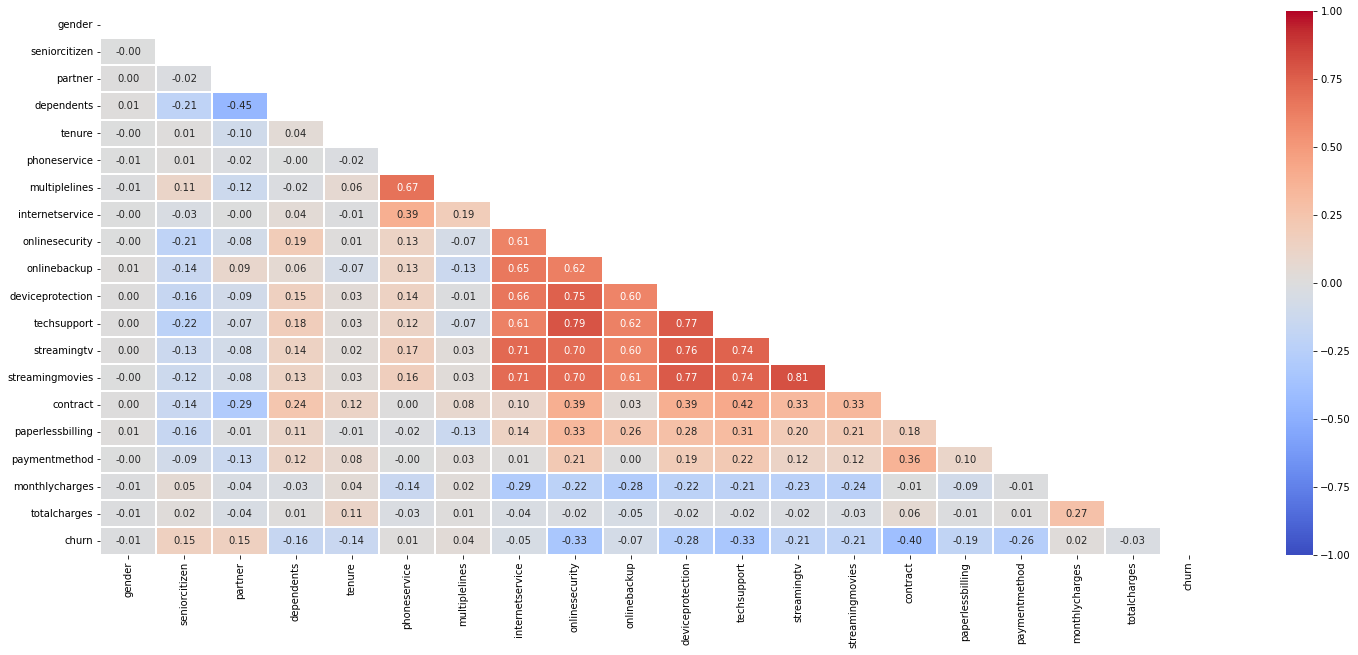

In [27]:
# Correlation between all variables
plt.figure(5, figsize=(25, 10))
corr = churn.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,linewidths=.2, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

<br>
<br>
<hr class="dotted">
<br>
<br>

# Feature importance and Feature Engineering

In this project, we need to transform both numerical and categorical variables.<br>
Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model.<br> 
In addition, we need to transform numeric columns into a common scale.<br>
This will prevent that the columns with large values dominate the learning process. 

In [28]:
churn.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

Label encoding is used to replace categorical values with numerical values. <br>
This encoding replaces every category with a numerical label. <br>
In this project, we use label encoding with the following binary variables: <br>
(1) Gender <br> 
(2) Partner<br>
(3) Dependents<br>
(4) PaperlessBilling<br>
(5) PhoneService <br>
(6) Churn<br>

In [29]:
churn["gender"] = churn["gender"].map({'Male':0, 'Female':1})
churn["partner"] = churn["partner"].map({'No':0, 'Yes':1})
churn["dependents"] = churn["dependents"].map({'No':0, 'Yes':1})
churn["paperlessbilling"] = churn["paperlessbilling"].map({'No':0, 'Yes':1})
churn["phoneservice"] = churn["phoneservice"].map({'No':0, 'Yes':1})
churn["churn"] = churn["churn"].map({'No':0, 'Yes':1})

Check which values and data types in each column.<br>
So we know which we need to dummy and which can be easily turned into 1/0 values

In [30]:
for column in churn.columns:
    print('Column: {} - Unique Values: {}'.format(column, churn[column].unique())) 
## Note that we have strings for numerical values in "total charges" column

Column: gender - Unique Values: [1 0]
Column: seniorcitizen - Unique Values: [0 1]
Column: partner - Unique Values: [1 0]
Column: dependents - Unique Values: [0 1]
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: phoneservice - Unique Values: [0 1]
Column: multiplelines - Unique Values: ['No phone service' 'No' 'Yes']
Column: internetservice - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: onlinesecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: onlinebackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: deviceprotection - Unique Values: ['No' 'Yes' 'No internet service']
Column: techsupport - Unique Values: ['No' 'Yes' 'No internet service']
Column: streamingtv - Unique Values: ['No' 'Yes' 'No internet service']
Column: streamingmovies - Unique

In [31]:
# No internet service to No
churn['streamingmovies'] = churn['streamingmovies'].map({'No internet service':0,'No':0, 'Yes':1})
churn['streamingtv'] = churn['streamingtv'].map({'No internet service':0,'No':0, 'Yes':1})
churn['techsupport'] = churn['techsupport'].map({'No internet service':0,'No':0, 'Yes':1})
churn['deviceprotection'] = churn['deviceprotection'].map({'No internet service':0,'No':0, 'Yes':1})
churn['onlinebackup'] = churn['onlinebackup'].map({'No internet service':0,'No':0, 'Yes':1})
churn['onlinesecurity'] = churn['onlinesecurity'].map({'No internet service':0,'No':0, 'Yes':1})

In [32]:
online_security = churn.groupby('onlinesecurity').churn.mean()
online_backup = churn.groupby('onlinebackup').churn.mean()
device_protection = churn.groupby('deviceprotection').churn.mean()
tech_support = churn.groupby('techsupport').churn.mean()
streaming_tv = churn.groupby('streamingtv').churn.mean()
streaming_movies = churn.groupby('streamingmovies').churn.mean()

In [33]:
internet_service = pd.DataFrame({'online__security':online_security,'online__backup':online_backup,'device__protection':device_protection,'tech__support':tech_support,"streaming__tv":streaming_tv,"streaming__movies":streaming_movies})
internet_service.index.names = ['']
internet_service_T = internet_service.T
internet_service_T

,0,1
online__security,0.313733,0.146402
online__backup,0.292164,0.215670
device__protection,0.286953,0.225393
tech__support,0.312300,0.151961
streaming__tv,0.243705,0.301147
streaming__movies,0.244362,0.299524


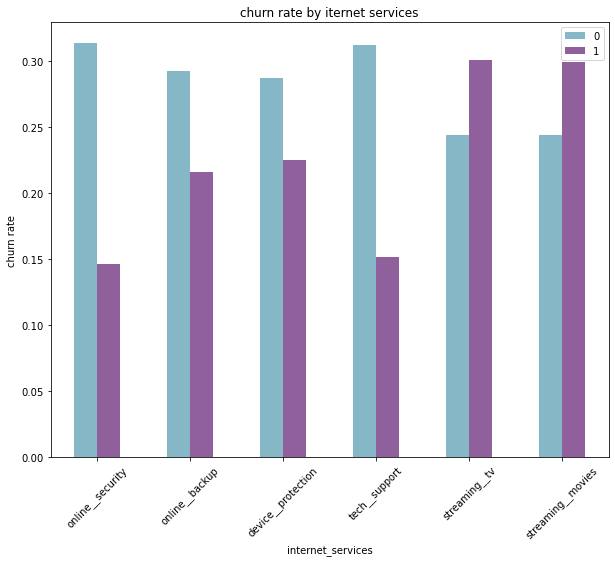

In [34]:
internet_service_T.plot(kind='bar',figsize = (10,8),color=['#86B7C6','#8F609B'],rot=45)
plt.xlabel('internet_services')
plt.ylabel('churn rate')
plt.title('churn rate by iternet services')
plt.show()

In [35]:
for column in churn.columns:
    print('Column: {} - Unique Values: {}'.format(column, churn[column].unique())) 

Column: gender - Unique Values: [1 0]
Column: seniorcitizen - Unique Values: [0 1]
Column: partner - Unique Values: [1 0]
Column: dependents - Unique Values: [0 1]
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: phoneservice - Unique Values: [0 1]
Column: multiplelines - Unique Values: ['No phone service' 'No' 'Yes']
Column: internetservice - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: onlinesecurity - Unique Values: [0 1]
Column: onlinebackup - Unique Values: [1 0]
Column: deviceprotection - Unique Values: [0 1]
Column: techsupport - Unique Values: [0 1]
Column: streamingtv - Unique Values: [0 1]
Column: streamingmovies - Unique Values: [0 1]
Column: contract - Unique Values: ['Month-to-month' 'One year' 'Two year']
Column: paperlessbilling - Unique Values: [1 0]
Column:

In [36]:
churn.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

### New feature - Does automatic affected on churn?

Some payment method denominations contain in parenthesis the word automatic.
These denominations are too long to be used as tick labels in further visualizations

In [37]:
# unique elements of the PaymentMethod column
churn.paymentmethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Therefore, we remove this clarification in parenthesis from the entries of the paymentmethod column.
And create new column with 'automatic'.

In [38]:
churn['automaticpay'] = 0
churn.loc[(churn['paymentmethod'] == 'Bank transfer (automatic)')|(churn['paymentmethod'] == 'Credit card (automatic)') ,'automaticpay'] = 1

checking if 'automatic' affectes on churn

In [39]:
churn.groupby('automaticpay').agg({'churn':['count','sum','mean']})

churn                
             count   sum      mean
automaticpay                      
0             3969  1379  0.347443
1             3063   490  0.159974

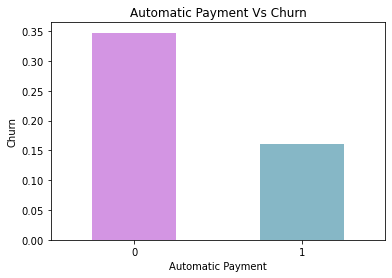

In [40]:
c = ['#D395E3','#86B7C6']
churn_automatic_mean = churn.groupby('automaticpay').churn.mean()
churn_automatic_mean.plot(kind='bar', color = c,rot=0)
plt.xlabel('Automatic Payment')
plt.ylabel('Churn')
plt.title('Automatic Payment Vs Churn')
plt.show()

In [41]:
# remove (automatic) from payment method names
churn['paymentmethod'] = churn['paymentmethod'].str.replace(' (automatic)', '', regex=False)

In [42]:
# unique elements of the PaymentMethod column after the modification 
churn.paymentmethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [43]:
churn.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'automaticpay'],
      dtype='object')

In [44]:
## Create copy of dataset
churn_transformed = churn.copy()

In [45]:
churn_transformed

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,...,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,automaticpay
0,1,0,1,0,1,0,No phone service,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0
1,0,0,0,0,34,1,No,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,0
2,0,0,0,0,2,1,No,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0
3,0,0,0,0,45,0,No phone service,DSL,1,0,...,1,0,0,One year,0,Bank transfer,42.30,1840.75,0,1
4,1,0,0,0,2,1,No,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,24,1,Yes,DSL,1,0,...,1,1,1,One year,1,Mailed check,84.80,1990.50,0,0
7028,1,0,1,1,72,1,Yes,Fiber optic,0,1,...,0,1,1,One year,1,Credit card,103.20,7362.90,0,1
7029,1,0,1,1,11,0,No phone service,DSL,1,0,...,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,0
7030,0,1,1,0,4,1,Yes,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,0


In [46]:
churn.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn', 'automaticpay'],
      dtype='object')

In [47]:
churn.shape

(7032, 21)

## New Feature - Tenure by year

In [48]:
churn_transformed['year'] = None
churn_transformed.loc[(churn_transformed['tenure'] <= 12),'year'] = 1
churn_transformed.loc[(churn_transformed['tenure'] > 12) &(churn_transformed['tenure'] <= 24),'year'] = 2
churn_transformed.loc[(churn_transformed['tenure'] > 24) & (churn_transformed['tenure'] <= 36),'year'] = 3
churn_transformed.loc[(churn_transformed['tenure'] > 36) & (churn_transformed['tenure'] <= 48),'year'] = 4
churn_transformed.loc[(churn_transformed['tenure'] > 48) & (churn_transformed['tenure'] <= 60),'year'] = 5
churn_transformed.loc[(churn_transformed['tenure'] > 60) & (churn_transformed['tenure'] <= 72),'year'] = 6
churn_transformed = churn_transformed.astype({"year": int})

In [49]:
churn_transformed.groupby('year').agg({'churn':['count','sum','mean']})

churn                
     count   sum      mean
year                      
1     2175  1037  0.476782
2     1024   294  0.287109
3      832   180  0.216346
4      762   145  0.190289
5      832   120  0.144231
6     1407    93  0.066098

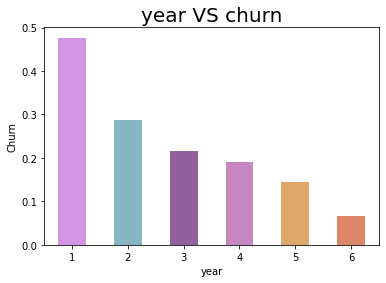

In [50]:
c = ['#D395E3','#86B7C6','#8F609B','#C686C1','#DDA869', '#DD8569']
churn_year_mean = churn_transformed.groupby('year').churn.mean()
churn_year_mean.plot(kind = 'bar', color = c, rot = 0)
plt.xlabel('year')
plt.ylabel('Churn')
plt.title('year VS churn',fontsize=20)
plt.show()

## New Feature - Has internt service?
#### Combine DSL and Fiber optic as one option of having internet service

In [51]:
churn_transformed['hasinternet'] = 0
churn_transformed.loc[(churn_transformed['internetservice'] == 'DSL')|(churn_transformed['internetservice'] == 'Fiber optic') ,'hasinternet'] = 1

In [52]:
churn_transformed.groupby('hasinternet').agg({'churn':['count','sum','mean']})

churn                
            count   sum      mean
hasinternet                      
0            1520   113  0.074342
1            5512  1756  0.318578

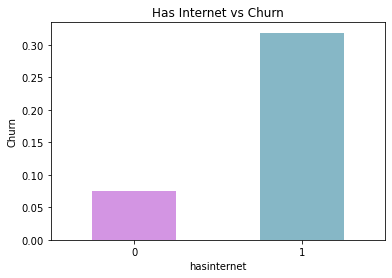

In [53]:
c = ['#D395E3','#86B7C6']
churn_hasinternet_mean = churn_transformed.groupby('hasinternet').churn.mean()
churn_hasinternet_mean.plot(kind='bar', color = c,rot=0)
plt.ylabel('Churn')
plt.title('Has Internet vs Churn')
plt.show()

We can see a high churn rate for clients with internet service. This likely relates to the Fiber optic product which has high churn rate.

## New Feature - Sum Internet Services
#### Summarizing total internet services per client

In [54]:
# internet_services = ['onlinesecurity','onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies']
churn_transformed['total_services'] =(churn_transformed[['onlinesecurity','onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies']] == 1).sum(axis=1)

In [55]:
churn_transformed.groupby('total_services').agg({'churn':['count','sum','mean']})

churn               
               count  sum      mean
total_services                     
0               2213  475  0.214641
1                966  442  0.457557
2               1033  370  0.358180
3               1117  306  0.273948
4                850  190  0.223529
5                569   71  0.124780
6                284   15  0.052817

The thought process is that clients that recieve less services are more likely to churn.

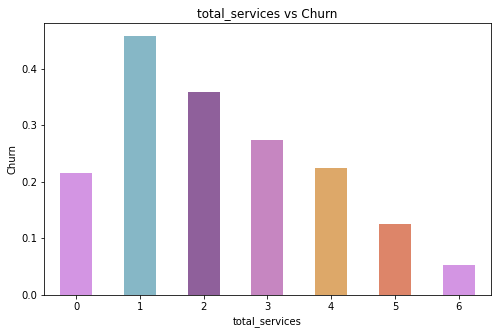

In [56]:
churn_total_services_mean = churn_transformed.groupby("total_services").churn.mean()
churn_total_services_mean.plot(kind='bar',figsize = (8,5),color=['#D395E3','#86B7C6','#8F609B','#C686C1','#DDA869', '#DD8569'],rot=0)
plt.ylabel('Churn')
plt.title('total_services vs Churn')
plt.show()

## New Feature - contract: year or month

In [57]:
churn_transformed["contract_year_month"] = churn_transformed["contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

In [58]:
churn_transformed.groupby('contract_year_month').agg({'churn':['count','sum','mean']})

churn                
                    count   sum      mean
contract_year_month                      
0                    3875  1655  0.427097
1                    3157   214  0.067786

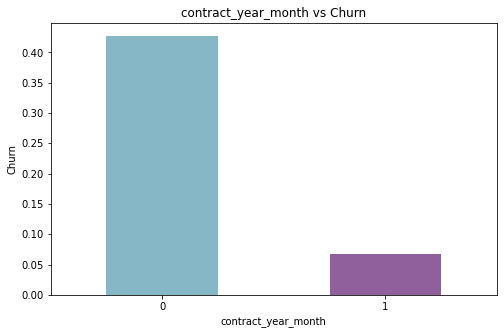

In [59]:
churn_contract_year_month_mean = churn_transformed.groupby('contract_year_month').churn.mean()
churn_contract_year_month_mean.plot(kind='bar',figsize = (8,5),color=['#86B7C6','#8F609B'],rot=0)
plt.ylabel('Churn')
plt.title('contract_year_month vs Churn')
plt.show()

In [60]:
# summary of the data frame
churn_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7032 non-null   int64  
 1   seniorcitizen        7032 non-null   int64  
 2   partner              7032 non-null   int64  
 3   dependents           7032 non-null   int64  
 4   tenure               7032 non-null   int64  
 5   phoneservice         7032 non-null   int64  
 6   multiplelines        7032 non-null   object 
 7   internetservice      7032 non-null   object 
 8   onlinesecurity       7032 non-null   int64  
 9   onlinebackup         7032 non-null   int64  
 10  deviceprotection     7032 non-null   int64  
 11  techsupport          7032 non-null   int64  
 12  streamingtv          7032 non-null   int64  
 13  streamingmovies      7032 non-null   int64  
 14  contract             7032 non-null   object 
 15  paperlessbilling     7032 non-null   i

### Correlation

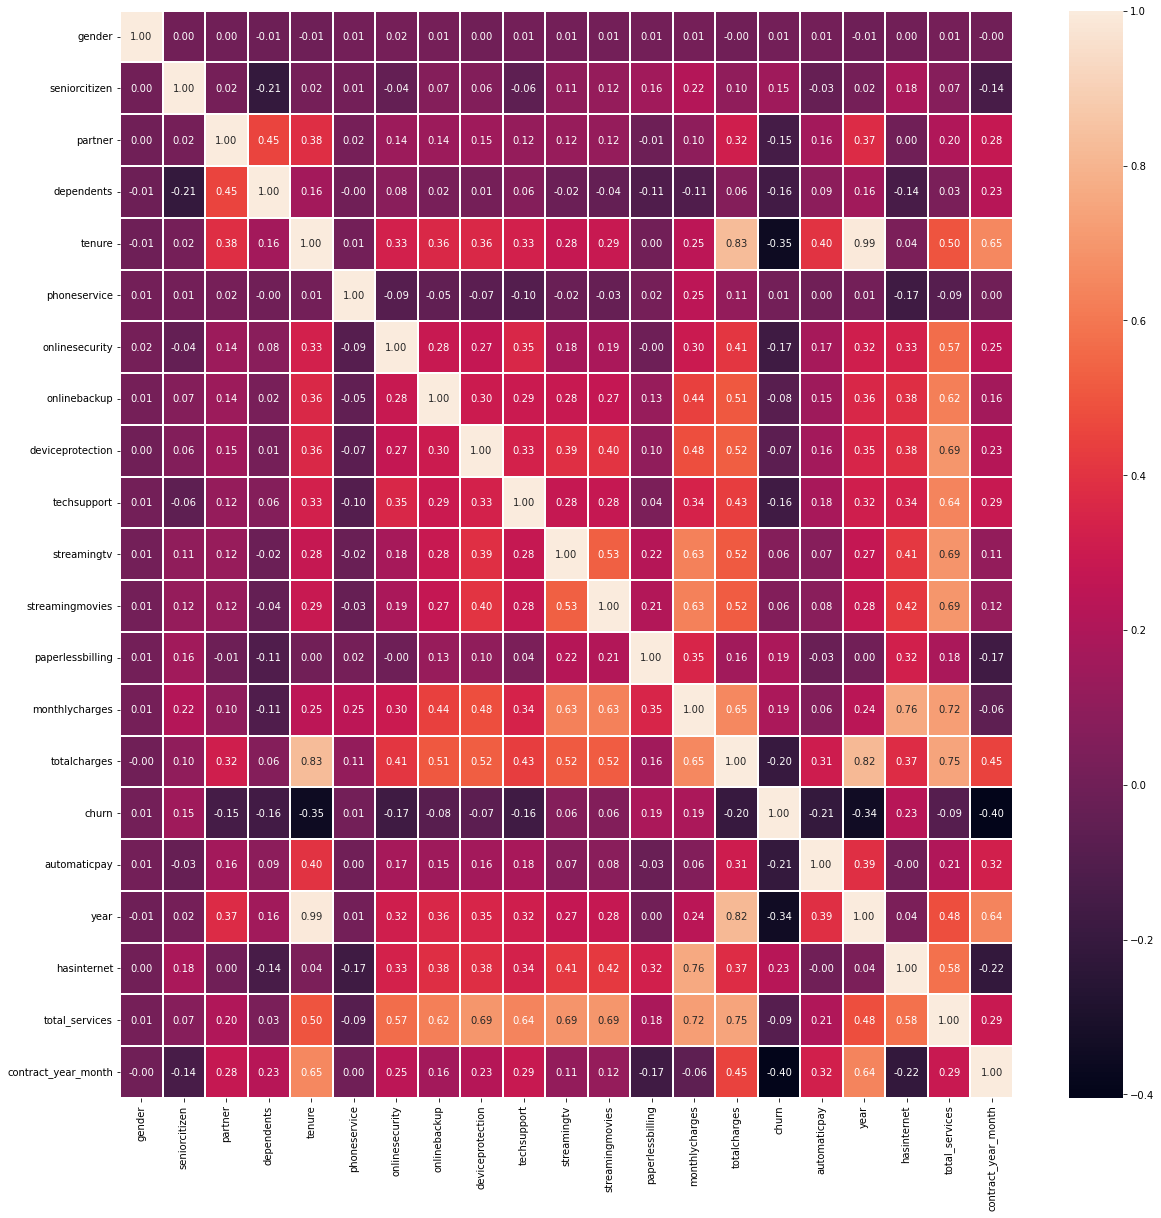

In [61]:
corr = churn_transformed.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(churn_transformed.corr(), annot=True,linewidths=.2, fmt=".2f")
plt.show()

### Correlation to label

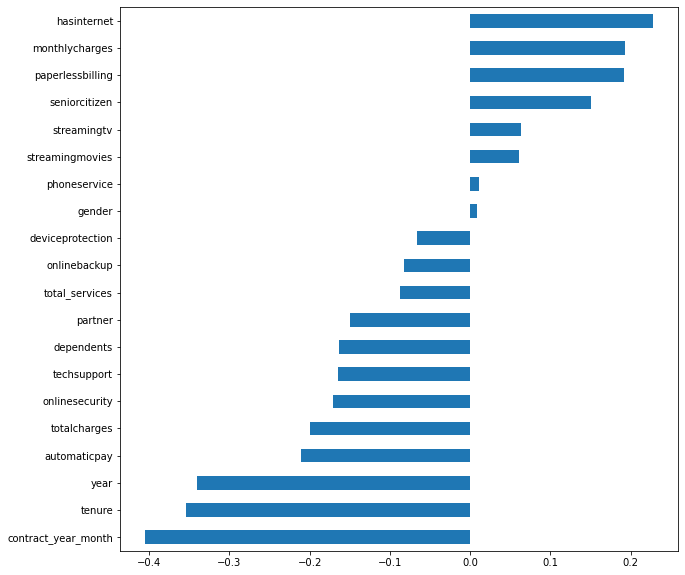

In [62]:
churn_transformed.corr()['churn'].drop('churn').sort_values(ascending=True).plot(kind='barh',figsize=(10, 10))
plt.show()

In [63]:
# Let's see what correlations are in the data
churn_transformed.corr()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,automaticpay,year,hasinternet,total_services,contract_year_month
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.016328,0.013093,0.000807,0.008507,...,0.010105,0.011902,0.013779,-0.000048,0.008545,0.011974,-0.005966,0.004745,0.014207,-0.003251
seniorcitizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,-0.038576,0.066663,0.059514,-0.060577,...,0.119842,0.156258,0.219874,0.102411,0.150541,-0.033775,0.016019,0.182519,0.067527,-0.137752
partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.143346,0.141849,0.153556,0.120206,...,0.118108,-0.013957,0.097825,0.319072,-0.149982,0.161327,0.369851,0.000286,0.204569,0.280202
dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,0.080786,0.023639,0.013900,0.063053,...,-0.038375,-0.110131,-0.112343,0.064653,-0.163128,0.094464,0.157483,-0.138383,0.030455,0.229715
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.328297,0.361138,0.361520,0.325288,...,0.285402,0.004823,0.246862,0.825880,-0.354049,0.396772,0.989273,0.037529,0.495318,0.649346
phoneservice,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,...,-0.033477,0.016696,0.248033,0.113008,0.011691,0.001159,0.007497,-0.171817,-0.091720,0.001243
onlinesecurity,0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,1.000000,0.283285,0.274875,0.354458,...,0.187426,-0.004051,0.296447,0.412619,-0.171270,0.174631,0.318140,0.332799,0.571158,0.246844
onlinebackup,0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.283285,1.000000,0.303058,0.293705,...,0.274523,0.127056,0.441529,0.510100,-0.082307,0.147661,0.355868,0.380990,0.623393,0.164393
deviceprotection,0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.274875,0.303058,1.000000,0.332850,...,0.402309,0.104079,0.482607,0.522881,-0.066193,0.161680,0.351970,0.380151,0.693077,0.225988
techsupport,0.008507,-0.060577,0.120206,0.063053,0.325288,-0.095138,0.354458,0.293705,0.332850,1.000000,...,0.280155,0.037536,0.338301,0.432868,-0.164716,0.181013,0.316890,0.335695,0.640671,0.285491


In [64]:
# drop the gender column from the dataset
# drop the phoneservice column from the dataset
# These two features show low corelation to the label
churn_transformed.drop(columns='gender', inplace=True)
churn_transformed.drop(columns='phoneservice', inplace=True)

##### Copy of dataset for improvement of algorithm

In [65]:
churn_B = churn_transformed.copy()

## Get dummies

One-hot encoding creates a new binary column for each level of the categorical variable.  <br>
The new column contains zeros and ones indicating the absence or presence of the category in the data.  <br>
In this project, we apply one-hot encoding to the following categorical variables:  <br>
(1) Contract  <br>
(2) PaymentMethod <br>
(3) MultipleLines  <br>
(4) InternetServices

In [66]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['multiplelines', 'internetservice', 'contract', 'paymentmethod']                            

In [67]:
# encode categorical variables with more than two levels using one-hot encoding
churn_transformed = pd.get_dummies(churn_transformed, columns = one_hot_encoding_columns)

The main drawback of this encoding is the significant increase in the dimensionality of the dataset (curse of dimensionality).
Therefore, this method should be avoided when the categorical column has a large number of unique values.

In [68]:
# Again rename to lower
churn_transformed = churn_transformed.rename(columns=str.lower)
churn_transformed.columns

Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'churn', 'automaticpay', 'year', 'hasinternet', 'total_services',
       'contract_year_month', 'multiplelines_no',
       'multiplelines_no phone service', 'multiplelines_yes',
       'internetservice_dsl', 'internetservice_fiber optic',
       'internetservice_no', 'contract_month-to-month', 'contract_one year',
       'contract_two year', 'paymentmethod_bank transfer',
       'paymentmethod_credit card', 'paymentmethod_electronic check',
       'paymentmethod_mailed check'],
      dtype='object')

In [69]:
# summary of the data frame
churn_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   seniorcitizen                   7032 non-null   int64  
 1   partner                         7032 non-null   int64  
 2   dependents                      7032 non-null   int64  
 3   tenure                          7032 non-null   int64  
 4   onlinesecurity                  7032 non-null   int64  
 5   onlinebackup                    7032 non-null   int64  
 6   deviceprotection                7032 non-null   int64  
 7   techsupport                     7032 non-null   int64  
 8   streamingtv                     7032 non-null   int64  
 9   streamingmovies                 7032 non-null   int64  
 10  paperlessbilling                7032 non-null   int64  
 11  monthlycharges                  7032 non-null   float64
 12  totalcharges                    70

In [70]:
for column in churn_transformed.columns:
    print('Column: {} - Unique Values: {}'.format(column, churn_transformed[column].unique())) 

Column: seniorcitizen - Unique Values: [0 1]
Column: partner - Unique Values: [1 0]
Column: dependents - Unique Values: [0 1]
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: onlinesecurity - Unique Values: [0 1]
Column: onlinebackup - Unique Values: [1 0]
Column: deviceprotection - Unique Values: [0 1]
Column: techsupport - Unique Values: [0 1]
Column: streamingtv - Unique Values: [0 1]
Column: streamingmovies - Unique Values: [0 1]
Column: paperlessbilling - Unique Values: [1 0]
Column: monthlycharges - Unique Values: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Column: totalcharges - Unique Values: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Column: churn - Unique Values: [0 1]
Column: automaticpay - Unique Values: [0 1]
Column: year - Unique Values: [1 3 4 2 6 5]
Colu

In [71]:
churn_transformed.head(5)

,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,...,internetservice_dsl,internetservice_fiber optic,internetservice_no,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer,paymentmethod_credit card,paymentmethod_electronic check,paymentmethod_mailed check
0,0,1,0,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,1,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


We have 7032 samples and 30 columns.

### Correlation matrix 

In [72]:
churn_transformed.corr()

,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,...,internetservice_dsl,internetservice_fiber optic,internetservice_no,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer,paymentmethod_credit card,paymentmethod_electronic check,paymentmethod_mailed check
seniorcitizen,1.000000,0.016957,-0.210550,0.015683,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
partner,0.016957,1.000000,0.452269,0.381912,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
dependents,-0.210550,0.452269,1.000000,0.163386,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,0.015683,0.381912,0.163386,1.000000,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
onlinesecurity,-0.038576,0.143346,0.080786,0.328297,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,...,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
onlinebackup,0.066663,0.141849,0.023639,0.361138,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
deviceprotection,0.059514,0.153556,0.013900,0.361520,0.274875,0.303058,1.000000,0.332850,0.389924,0.402309,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325
techsupport,-0.060577,0.120206,0.063053,0.325288,0.354458,0.293705,0.332850,1.000000,0.277549,0.280155,...,0.312183,-0.020299,-0.335695,-0.285491,0.096258,0.240924,0.100472,0.117024,-0.114807,-0.084631
streamingtv,0.105445,0.124483,-0.016499,0.280264,0.175514,0.281601,0.389924,0.277549,1.000000,0.533380,...,0.014973,0.329744,-0.414951,-0.112550,0.061930,0.072124,0.046121,0.040010,0.144747,-0.247712
streamingmovies,0.119842,0.118108,-0.038375,0.285402,0.187426,0.274523,0.402309,0.280155,0.533380,1.000000,...,0.025623,0.322457,-0.418450,-0.117867,0.064780,0.075603,0.048755,0.048398,0.137420,-0.250290


#### Plot correlations to churn

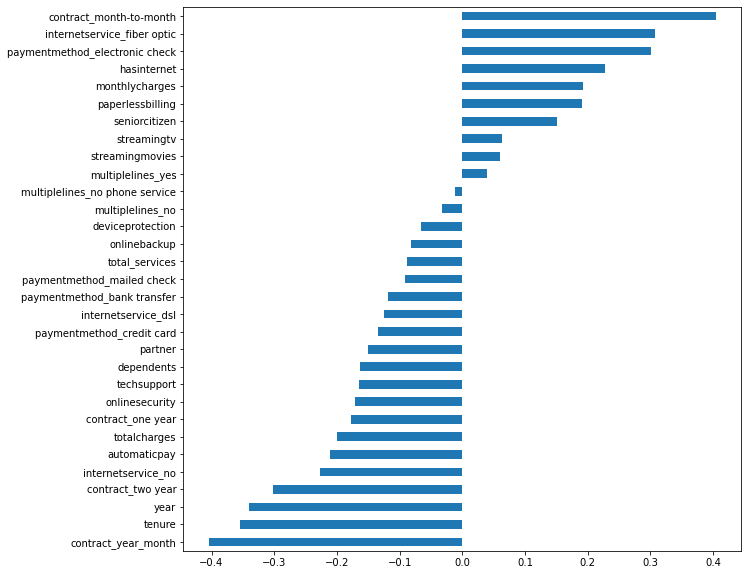

In [73]:
churn_transformed.corr()['churn'].drop('churn').sort_values(ascending=True).plot(kind='barh',figsize=(10, 10))
plt.show()

## Colclusions:
* Negative correlation between churn and tenure - new customers are more likely to churn, rather than existing customers.
* Positive correlation between "senior citizen" and churn - higher churn rate if the customer is a senior citizen.
* Also positive correlation between monthly charges and chun - higher charges lead to highr churn rate.
* High correlation between monthly contract to churn - what does it mean? Makes sense because people who sign a contract for a year/two years stay longer in the company, rather than clients who have to renew the contract each month. In addition - having a two year contract leads to smaller churn rate.

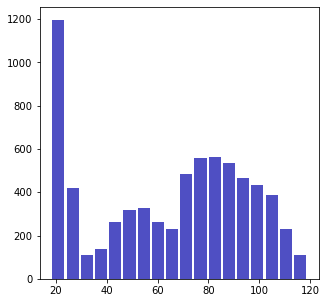

<Figure size 360x360 with 0 Axes>

In [74]:
rcParams['figure.figsize'] = 5, 5
plt.hist(x=churn_transformed['monthlycharges'].dropna(), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
fig = plt.figure()
plt.show()

C:\Users\Natalie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


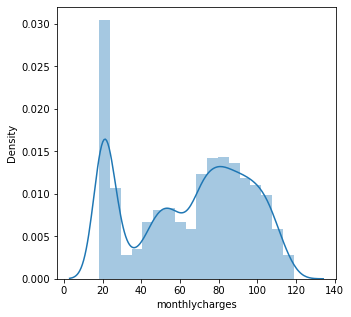

<Figure size 360x360 with 0 Axes>

In [75]:
rcParams['figure.figsize'] = 5, 5
sns.distplot(churn_transformed['monthlycharges'])
fig = plt.figure()
plt.show()

### Normalizing the data

In [76]:
# Scale numerical data to fit labels - e.g. total charges and monthly charges, tenure
# We will scale values to [0,1] values
norm_columns = ['tenure', 'monthlycharges', 'totalcharges']

for i in norm_columns:
        max_val = churn[i].max()
        min_val = churn[i].min()
        churn[i] = (churn[i] - min_val) / (max_val - min_val)

<br>
<br>
<hr class="dotted">
<br>
<br>

# Split into train and test sets

The first step when building a model is to split the data into two groups, which are typically referred to as training and testing sets. <br>
The training set is used by the machine learning algorithm to build the model. <br>
The test set contains samples that are not part of the learning process and is used to evaluate the model’s performance. <br>
It is important to assess the quality of the model using unseen data to guarantee an objective evaluation.

In [77]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(churn_transformed, test_size=0.2, random_state=0, shuffle=True)
label = 'churn'

x_train = train.drop(label, axis=1)
y_train = train[label]

x_test = test.drop(label, axis=1)
y_test = test[label]

In [78]:
train.head(5)

,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,...,internetservice_dsl,internetservice_fiber optic,internetservice_no,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer,paymentmethod_credit card,paymentmethod_electronic check,paymentmethod_mailed check
2959,0,1,0,24,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
5105,0,1,1,71,1,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
5354,0,1,1,70,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5066,0,0,1,49,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
156,0,0,0,22,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


In [79]:
train.shape

(5625, 32)

In [80]:
test.head(5)

,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,...,internetservice_dsl,internetservice_fiber optic,internetservice_no,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer,paymentmethod_credit card,paymentmethod_electronic check,paymentmethod_mailed check
5552,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
5805,0,0,0,16,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2640,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3976,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6429,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [81]:
test.shape

(1407, 32)

In [82]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5625, 31), (5625,), (1407, 31), (1407,))

In [83]:
x_train

,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,...,internetservice_dsl,internetservice_fiber optic,internetservice_no,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer,paymentmethod_credit card,paymentmethod_electronic check,paymentmethod_mailed check
2959,0,1,0,24,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
5105,0,1,1,71,1,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
5354,0,1,1,70,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5066,0,0,1,49,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
156,0,0,0,22,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3264,0,0,0,65,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1653,0,1,1,50,1,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,0
2607,0,1,1,14,0,1,0,1,1,1,...,1,0,0,1,0,0,0,1,0,0


In [84]:
y_train

2959    0
5105    0
5354    0
5066    0
156     0
       ..
4931    0
3264    0
1653    1
2607    0
2732    0
Name: churn, Length: 5625, dtype: int64

In [85]:
x_test

,seniorcitizen,partner,dependents,tenure,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,...,internetservice_dsl,internetservice_fiber optic,internetservice_no,contract_month-to-month,contract_one year,contract_two year,paymentmethod_bank transfer,paymentmethod_credit card,paymentmethod_electronic check,paymentmethod_mailed check
5552,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
5805,0,0,0,16,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2640,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3976,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
6429,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,0,1,1,69,1,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
5693,1,1,1,71,1,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0
1657,0,0,0,5,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2761,0,1,0,64,1,1,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0


In [86]:
y_test

5552    0
5805    0
2640    0
3976    1
6429    1
       ..
2752    0
5693    1
1657    1
2761    0
2913    0
Name: churn, Length: 1407, dtype: int64

<br>
<br>
<hr class="dotted">
<br>
<br>

# Algorithm implementation

## Decision tree

#### Max depths =2, 3, 4

Max depth =2



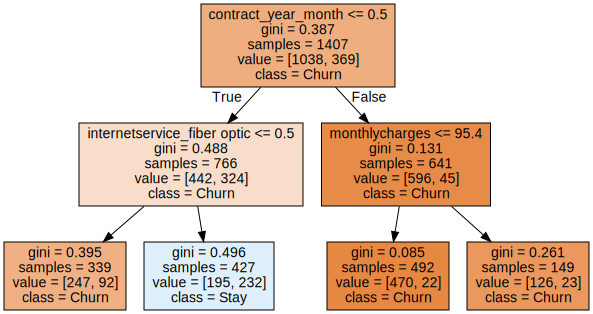

Max depth =3



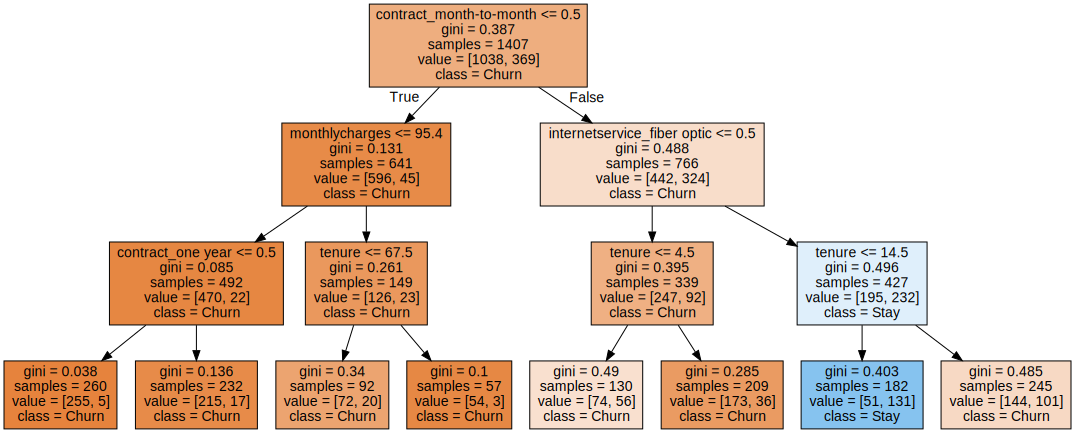

Max depth =4



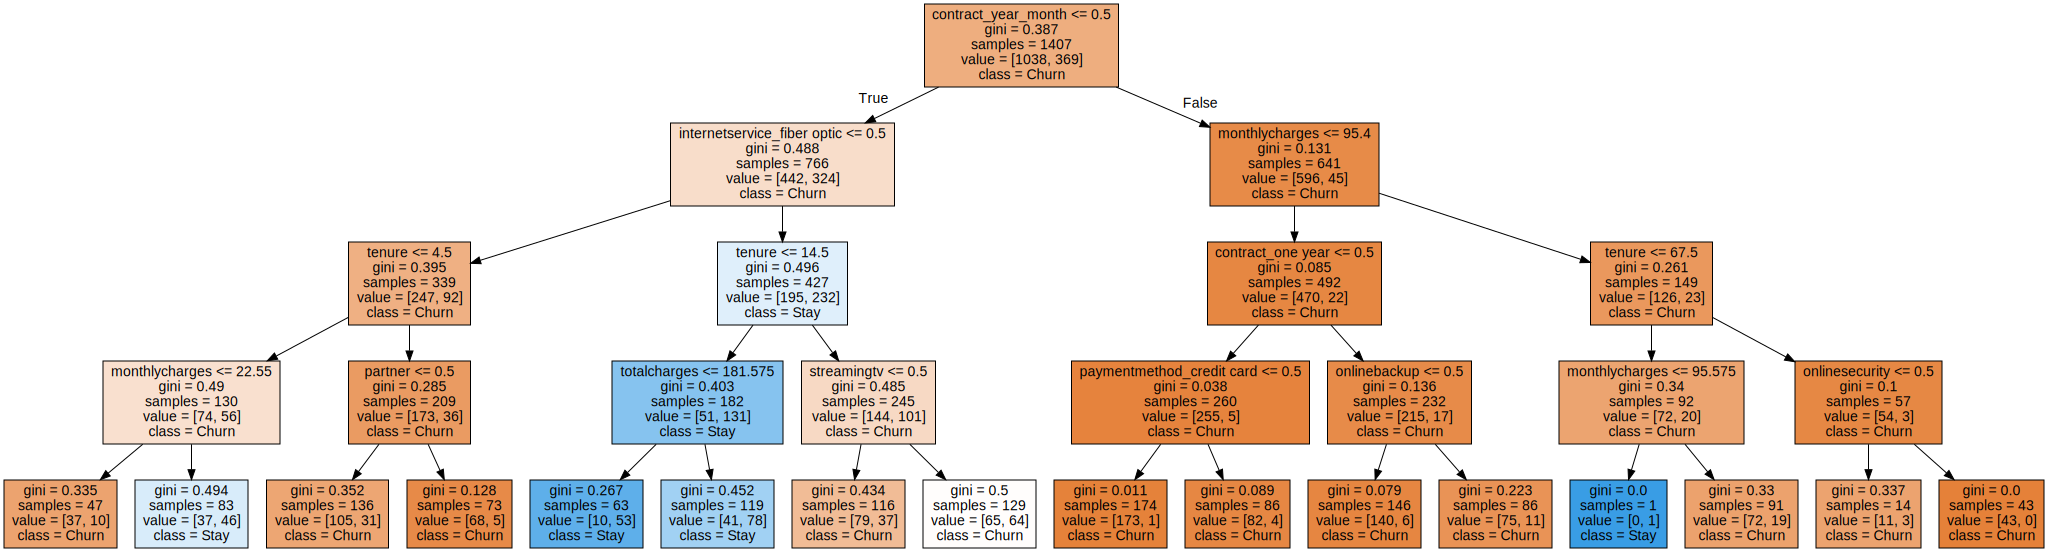

In [87]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

Tree_Max_Depths=[2,3,4]

output_tree=pd.DataFrame()

for i in Tree_Max_Depths:
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(x_test,y_test)
    y_test_pred_DecisionTree = clf.predict(x_test) 
    print('Max depth ={}\n'.format(i))
    plot_tree(clf, x_train.columns, ['Churn', 'Stay'])
    output_dec_tree = pd.DataFrame({'Churned_y_test':y_test, 'Churn_pred': y_test_pred_DecisionTree}) 
    output_dec_tree.to_csv('Churn_DecisionTree_Prediction.csv', index=False) 
    output_tree[i]=output_dec_tree['Churn_pred']
        
output_tree.rename(columns = {2:'y_test_predTree2', 3:'y_test_predTree3',4:'y_test_predTree4'}, inplace = True)

In [88]:
output_tree

,y_test_predTree2,y_test_predTree3,y_test_predTree4
5552,0,0,0
5805,0,0,0
2640,0,0,0
3976,0,0,1
6429,1,1,1
...,...,...,...
2752,0,0,0
5693,1,0,0
1657,1,1,1
2761,0,0,0


### Conclusions: 
* Contract month to month - leads to high churn rate [predicts churn]
* Small total charges lead to staying
* Short tenure [new clients] - churn
* No fiber optic internet - might lead to churn [higher chance]

### KNN - K Nearest Neighbors

#### K=3-15

In [89]:
from sklearn.neighbors import KNeighborsClassifier 
k_list=[*range(3, 16, 1)] #list of Ks for algorithm

outputknn = pd.DataFrame()  #blank df to insert results

for i in k_list:
    clf = KNeighborsClassifier(n_neighbors=i)        
    clf.fit(x_train, y_train)
    y_test_pred_Knn = clf.predict(x_test) 
    output = pd.DataFrame({'Churned_y_test':y_test, 'Churn_pred': y_test_pred_Knn}) 
    output.to_csv('my_Knn_Prediction.csv', index=False) 
    outputknn[i]=output['Churn_pred']    
    
outputknn['Churned_y_test']=y_test

In [90]:
outputknn

,3,4,5,6,7,8,9,10,11,12,13,14,15,Churned_y_test
5552,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5805,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2640,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3976,0,0,1,1,1,1,1,1,1,1,1,1,1,1
6429,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5693,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1657,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2761,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
outputknn.rename(columns = {3:'y_test_predKNN3', 4:'y_test_predKNN4',5:'y_test_predKNN5',
                           6:'y_test_predKNN6', 7:'y_test_predKNN7',8:'y_test_predKNN8',
                           9:'y_test_predKNN9', 10:'y_test_predKNN10',11:'y_test_predKNN11',
                           12:'y_test_predKNN12', 13:'y_test_predKNN13',14:'y_test_predKNN14',
                           15:'y_test_predKNN15'}, inplace = True)

In [92]:
outputknn

,y_test_predKNN3,y_test_predKNN4,y_test_predKNN5,y_test_predKNN6,y_test_predKNN7,y_test_predKNN8,y_test_predKNN9,y_test_predKNN10,y_test_predKNN11,y_test_predKNN12,y_test_predKNN13,y_test_predKNN14,y_test_predKNN15,Churned_y_test
5552,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5805,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2640,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3976,0,0,1,1,1,1,1,1,1,1,1,1,1,1
6429,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5693,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1657,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2761,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Random Forest
#### 3 different max depth values and 100 estimators 

### Max depths: 3, 4, 5

In [93]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

features = x_train.columns
RandFor=[3,4,5]
OutputRandFor=pd.DataFrame()
ran_for_feaure_importance=pd.DataFrame();

for i in RandFor:
    RanomForestAlg = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=1)
    # n_estimators = number of trees, defined 100 in instructions
    # max_depth = the maximum depth of the trees - we chose 2,3,4 similar to decition tree        
    RanomForestAlg.fit(x_train, y_train) # running\training the algorithm with the train data
    y_test_pred_RandomForest = RanomForestAlg.predict(x_test) # making a prediction based on "test" data features
    output = pd.DataFrame({'Churned_y_test':y_test, 'Churn_pred': y_test_pred_RandomForest}) # saving results to DataFrame
    OutputRandFor[i]=output['Churn_pred']
    
    ## feature importance
    feature_importances = RanomForestAlg.feature_importances_
    stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
    stats.sort_values('importance', ascending=False,inplace=True) # Sorting the data frame
    print('Feature importance for max depth of {}'.format(i))
    display(stats)
    print('\n')

    
OutputRandFor.rename(columns = {3:'y_test_predRandFor3', 4:'y_test_predRandFor4',5:'y_test_predRandFor5'}, inplace = True)
OutputRandFor

Feature importance for max depth of 3


,feature,importance
17,contract_year_month,0.204957
24,contract_month-to-month,0.142328
3,tenure,0.119411
29,paymentmethod_electronic check,0.079217
22,internetservice_fiber optic,0.078337
14,year,0.073314
26,contract_two year,0.063803
11,monthlycharges,0.044212
15,hasinternet,0.038154
12,totalcharges,0.037300




Feature importance for max depth of 4


,feature,importance
17,contract_year_month,0.177674
3,tenure,0.126163
24,contract_month-to-month,0.121876
22,internetservice_fiber optic,0.094082
14,year,0.074600
29,paymentmethod_electronic check,0.067802
26,contract_two year,0.060603
11,monthlycharges,0.049048
12,totalcharges,0.047763
15,hasinternet,0.037729




Feature importance for max depth of 5


,feature,importance
17,contract_year_month,0.162375
3,tenure,0.134528
24,contract_month-to-month,0.115324
22,internetservice_fiber optic,0.082569
14,year,0.070850
29,paymentmethod_electronic check,0.069014
12,totalcharges,0.060317
11,monthlycharges,0.055144
26,contract_two year,0.053263
15,hasinternet,0.041287


,y_test_predRandFor3,y_test_predRandFor4,y_test_predRandFor5
5552,0,0,0
5805,0,0,0
2640,0,0,0
3976,0,1,1
6429,1,1,1
...,...,...,...
2752,0,0,0
5693,0,0,0
1657,1,1,1
2761,0,0,0


#### Similar feature importance in all depths. Must check accuracy.
Lets print feature importance: 

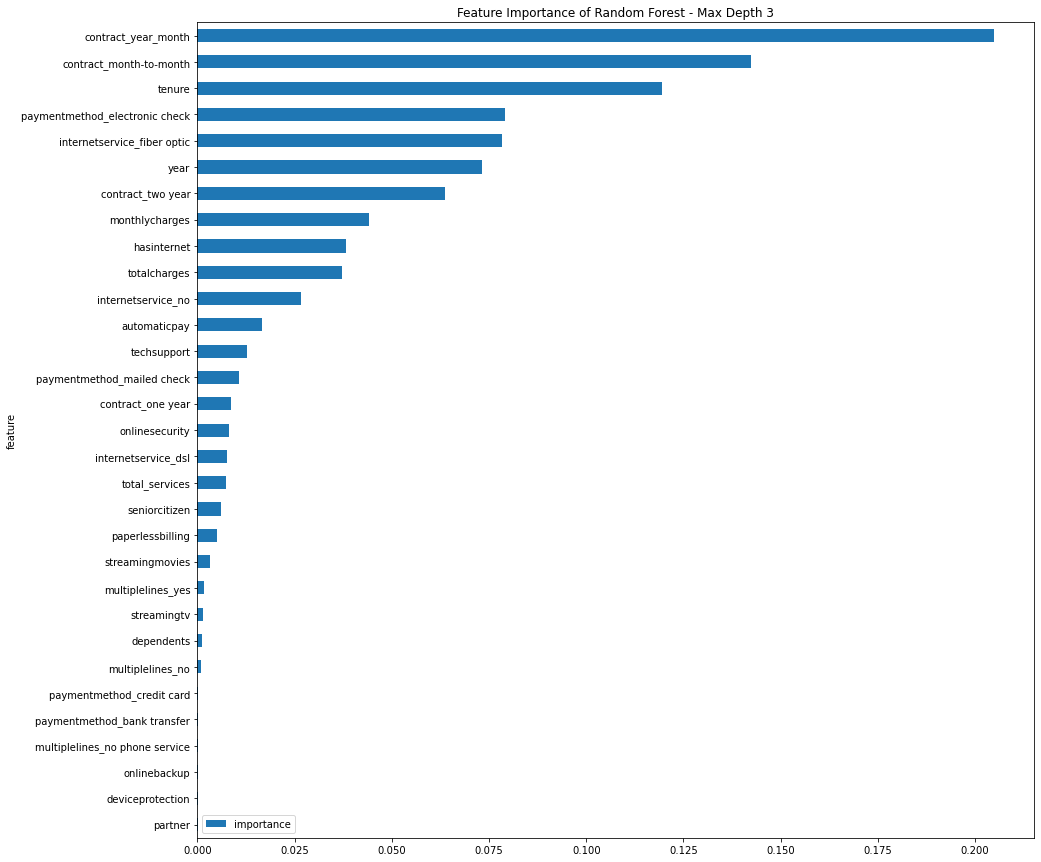

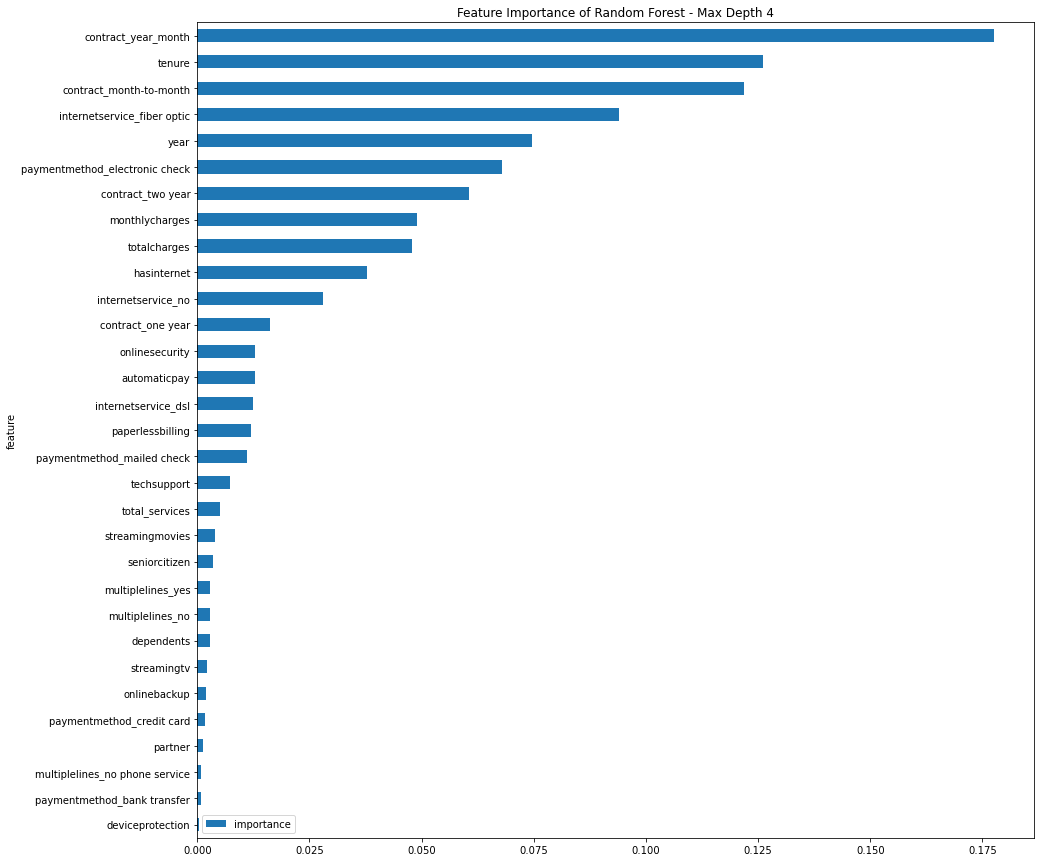

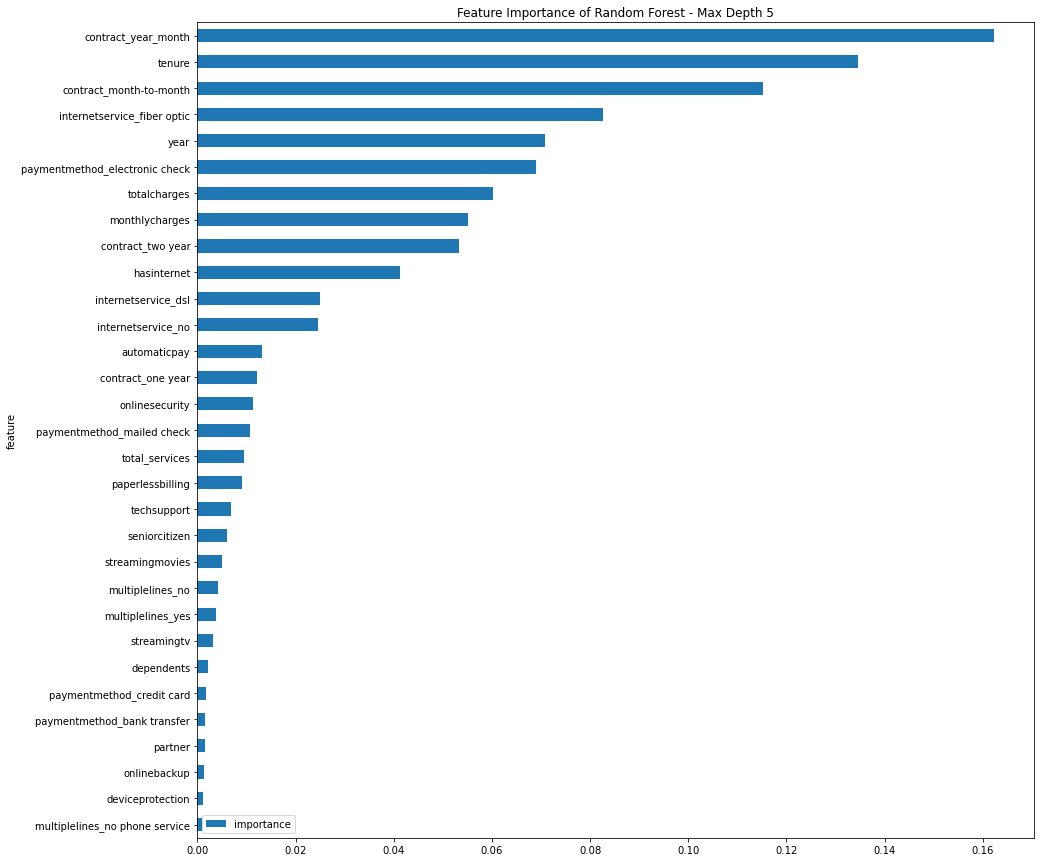

In [94]:
for i in RandFor:
    RanomForestAlg = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=1)
    # n_estimators = number of trees, defined 100 in instructions
    # max_depth = the maximum depth of the trees - we chose 2,3,4 similar to decition tree        
    RanomForestAlg.fit(x_train, y_train) # running\training the algorithm with the train data
    y_test_pred_RandomForest = RanomForestAlg.predict(x_test) # making a prediction based on "test" data features    
    ## feature importance
    feature_importances = RanomForestAlg.feature_importances_
    stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
    stats_sort=stats.sort_values('importance', ascending=True) # Sorting the data frame
    ## Print feature importance
    stats_sort.plot(y='importance', x='feature', kind='barh',figsize=(15,15))
    plt.title(f'Feature Importance of Random Forest - Max Depth {i}');

### Accuracy - test accuracty of all algorithms 

In [95]:
# concatenate result set - create df or results set
results_set=pd.concat([OutputRandFor, outputknn, output_tree], axis=1)

In [96]:
results_set.columns

Index(['y_test_predRandFor3', 'y_test_predRandFor4', 'y_test_predRandFor5',
       'y_test_predKNN3', 'y_test_predKNN4', 'y_test_predKNN5',
       'y_test_predKNN6', 'y_test_predKNN7', 'y_test_predKNN8',
       'y_test_predKNN9', 'y_test_predKNN10', 'y_test_predKNN11',
       'y_test_predKNN12', 'y_test_predKNN13', 'y_test_predKNN14',
       'y_test_predKNN15', 'Churned_y_test', 'y_test_predTree2',
       'y_test_predTree3', 'y_test_predTree4'],
      dtype='object')

In [97]:
from sklearn.metrics import accuracy_score
results_columns=results_set.columns
for i in results_columns:
    print('{} '.format(i))
    print(accuracy_score(y_test, results_set[i]))

y_test_predRandFor3 
0.7839374555792467
y_test_predRandFor4 
0.7931769722814499
y_test_predRandFor5 
0.7960199004975125
y_test_predKNN3 
0.7455579246624022
y_test_predKNN4 
0.7661691542288557
y_test_predKNN5 
0.7619047619047619
y_test_predKNN6 
0.7796730632551528
y_test_predKNN7 
0.7711442786069652
y_test_predKNN8 
0.783226723525231
y_test_predKNN9 
0.7825159914712153
y_test_predKNN10 
0.7896233120113717
y_test_predKNN11 
0.7867803837953091
y_test_predKNN12 
0.7867803837953091
y_test_predKNN13 
0.7810945273631841
y_test_predKNN14 
0.783226723525231
y_test_predKNN15 
0.7810945273631841
Churned_y_test 
1.0
y_test_predTree2 
0.7640369580668088
y_test_predTree3 
0.7945984363894811
y_test_predTree4 
0.8017057569296375


### Conclusion: 
#### Decision tree with max depth of 4 has highest accuracy of all models
#### After that - decision tree with max depth of 3

## Testing accuracy against benchmark

In [98]:
def get_benchmark_predictions(x, benchmark_value): ## Use the function from class
    return np.ones(len(x))*benchmark_value
y_test_pred_Benchmark = get_benchmark_predictions(x_test, 0)
y_test_pred_Benchmark
test_acc = accuracy_score(y_test, y_test_pred_Benchmark)
test_acc

0.7377398720682303

### Conclusion: our best model has an accuracy score of ~80%, better than the benchmark test with accuracy of 73%. 



# Improvement Of Model - Dealing With Overfitting And Testing Increasing Accuracy

### New feature - additional internet services
#### Summarizing total internet services per client
#### The thought process is that clients that recieve less services are more likely to churn.

In [99]:
churn_B.columns

Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges',
       'churn', 'automaticpay', 'year', 'hasinternet', 'total_services',
       'contract_year_month'],
      dtype='object')

# New Feature - Average Monthly Charges

In [100]:
churn_B["avg_charges"] = churn_B["totalcharges"] / (churn_B["tenure"] + 1)

In [101]:
churn_B["avg_charges"]

0        14.925000
1        53.985714
2        36.050000
3        40.016304
4        50.550000
           ...    
7027     79.620000
7028    100.861644
7029     28.870833
7030     61.320000
7031    102.156716
Name: avg_charges, Length: 7032, dtype: float64

# New Feature - Average Per Service

In [102]:
churn_B["avg_vs_Service"] = churn_B["monthlycharges"] / (churn_B['total_services'] + 1)

In [103]:
churn_B["avg_vs_Service"]

0       14.925000
1       18.983333
2       17.950000
3       10.575000
4       70.700000
          ...    
7027    14.133333
7028    20.640000
7029    14.800000
7030    74.400000
7031    17.608333
Name: avg_vs_Service, Length: 7032, dtype: float64

# New Feature - fare group
#### Based on the tenure column and average monthly payment.
#### Average values were calculated according to seniority in the company and two columns were defined by showing the value of the 25th and 75th percentile of average monthly payment  for each group.


In [104]:
churn_B['avgmonthlychargepertenure'] =  churn_B.groupby('tenure')['monthlycharges'].transform('mean')

churn_B['25minmonthlychargepertenure'] = churn_B.groupby('tenure')['monthlycharges'].transform(lambda x: x.quantile(.25)).astype('int')
churn_B['75maxmonthlychargepertenure'] = churn_B.groupby('tenure')['monthlycharges'].transform(lambda x: x.quantile(.75)).astype('int')
churn_B['FareGroup'] = 'Normal'

churn_B.loc[(churn_B['monthlycharges'] >= churn_B['75maxmonthlychargepertenure']), 'FareGroup']  = 'Overpaid'
churn_B.loc[(churn_B['monthlycharges'] <= churn_B['25minmonthlychargepertenure']), 'FareGroup'] = 'Underpaid'

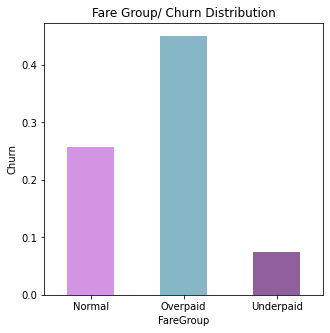

In [105]:
c = ['#D395E3','#86B7C6','#8F609B','#C686C1','#DDA869', '#DD8569']
churn_year_mean = churn_B.groupby('FareGroup').churn.mean()
churn_year_mean.plot(kind='bar', color = c,rot=0)

plt.ylabel('Churn')
#plt.ylim(0, 1)
plt.title('Fare Group/ Churn Distribution');

#### Conclusion: The overpaying group shows high churn rates

In [106]:
churn_B.columns

Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges',
       'churn', 'automaticpay', 'year', 'hasinternet', 'total_services',
       'contract_year_month', 'avg_charges', 'avg_vs_Service',
       'avgmonthlychargepertenure', '25minmonthlychargepertenure',
       '75maxmonthlychargepertenure', 'FareGroup'],
      dtype='object')

In [107]:
for column in churn_B.columns:
    print('Column: {} - Unique Values: {}'.format(column, churn_B[column].unique())) 

Column: seniorcitizen - Unique Values: [0 1]
Column: partner - Unique Values: [1 0]
Column: dependents - Unique Values: [0 1]
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: multiplelines - Unique Values: ['No phone service' 'No' 'Yes']
Column: internetservice - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: onlinesecurity - Unique Values: [0 1]
Column: onlinebackup - Unique Values: [1 0]
Column: deviceprotection - Unique Values: [0 1]
Column: techsupport - Unique Values: [0 1]
Column: streamingtv - Unique Values: [0 1]
Column: streamingmovies - Unique Values: [0 1]
Column: contract - Unique Values: ['Month-to-month' 'One year' 'Two year']
Column: paperlessbilling - Unique Values: [1 0]
Column: paymentmethod - Unique Values: ['Electronic check' 'Mailed check' 'Bank transfer'

In [108]:
### Similar process to first run of algorithm: 
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns_B = ['multiplelines', 'internetservice', 'contract', 'paymentmethod', 'FareGroup']

# encode categorical variables with more than two levels using one-hot encoding
churn_B = pd.get_dummies(churn_B, columns = one_hot_encoding_columns_B)

churn_B = churn_B.rename(columns=str.lower)

In [109]:
churn_B.shape

(7032, 40)

In [110]:
churn_B.columns

Index(['seniorcitizen', 'partner', 'dependents', 'tenure', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'paperlessbilling', 'monthlycharges', 'totalcharges',
       'churn', 'automaticpay', 'year', 'hasinternet', 'total_services',
       'contract_year_month', 'avg_charges', 'avg_vs_service',
       'avgmonthlychargepertenure', '25minmonthlychargepertenure',
       '75maxmonthlychargepertenure', 'multiplelines_no',
       'multiplelines_no phone service', 'multiplelines_yes',
       'internetservice_dsl', 'internetservice_fiber optic',
       'internetservice_no', 'contract_month-to-month', 'contract_one year',
       'contract_two year', 'paymentmethod_bank transfer',
       'paymentmethod_credit card', 'paymentmethod_electronic check',
       'paymentmethod_mailed check', 'faregroup_normal', 'faregroup_overpaid',
       'faregroup_underpaid'],
      dtype='object')

# Correlations

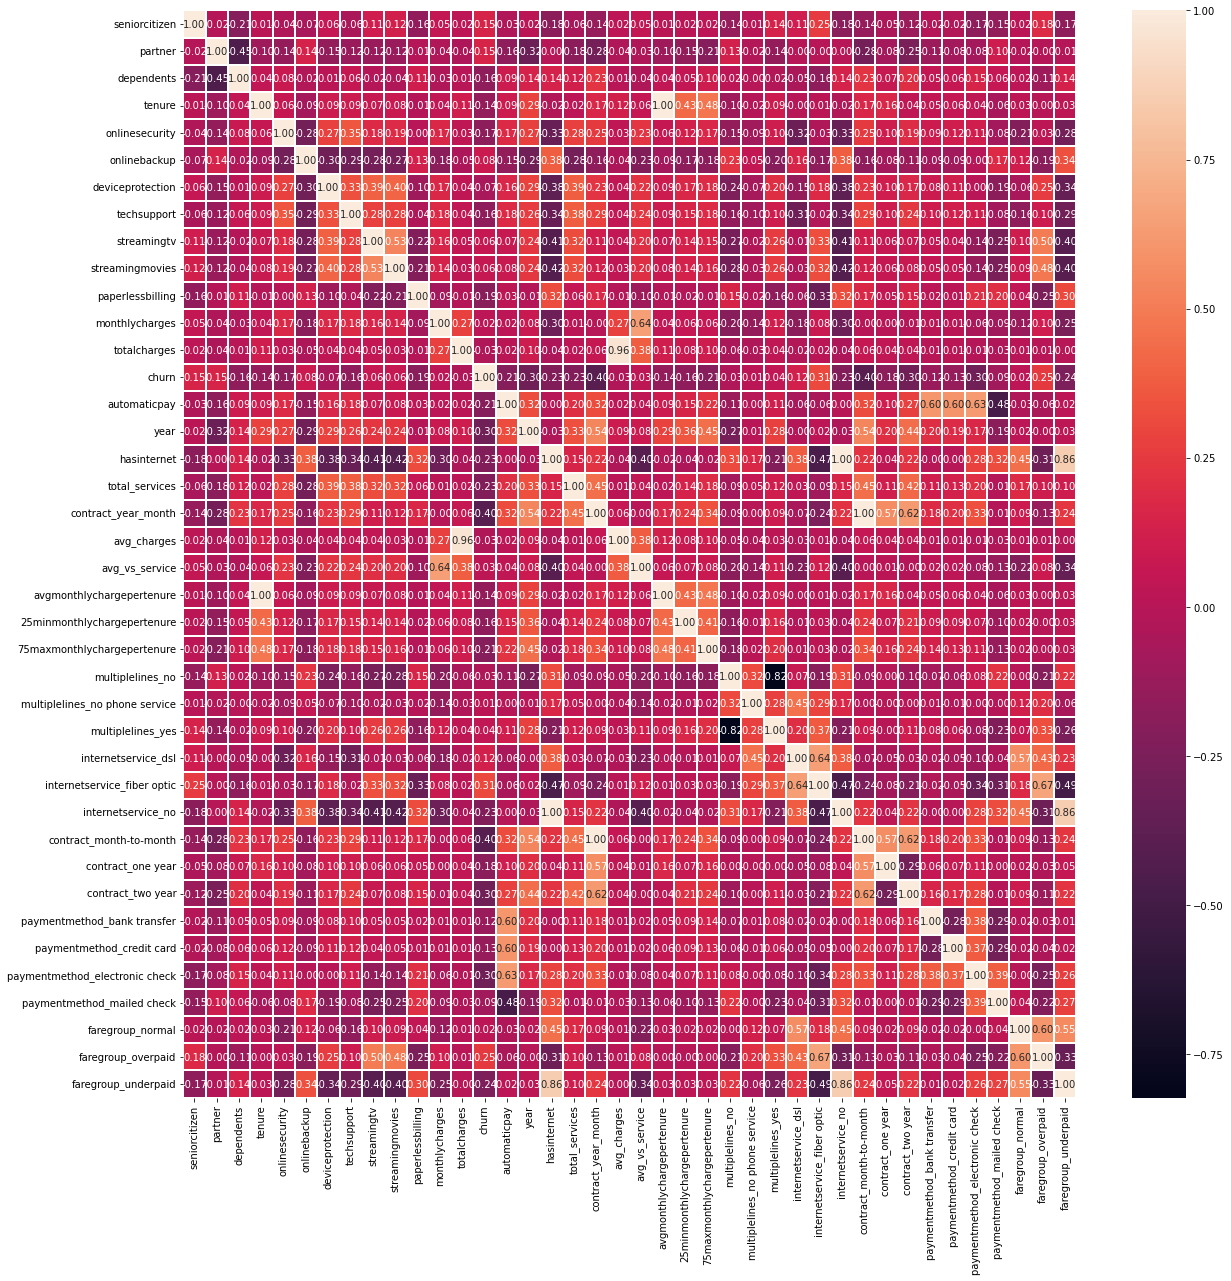

In [111]:
# Correlation between all variables
corr = churn_B.apply(lambda x: pd.factorize(x)[0]).corr()
rcParams['figure.figsize'] = 20, 20
fig = plt.figure()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,linewidths=.2, fmt=".2f")
plt.show()

## Correlation To Label

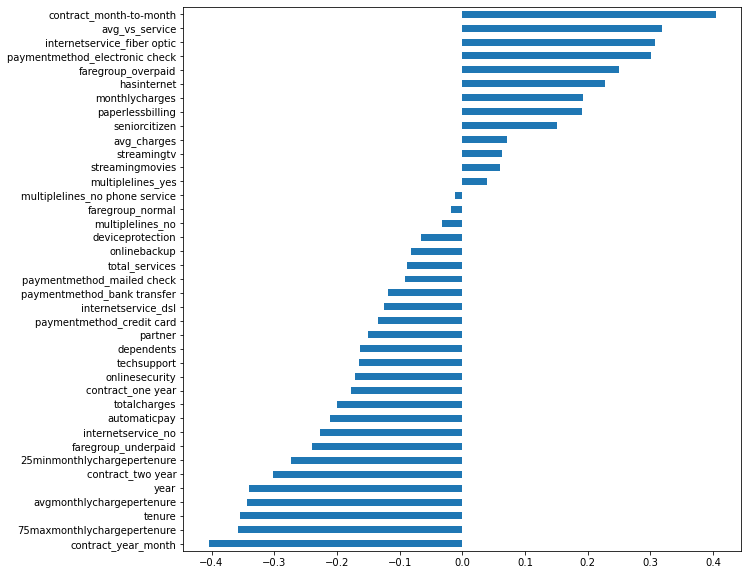

In [112]:
churn_B.corr()['churn'].drop('churn').sort_values(ascending=True).plot(kind='barh',figsize=(10, 10))
plt.show()

In [113]:
churn_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   seniorcitizen                   7032 non-null   int64  
 1   partner                         7032 non-null   int64  
 2   dependents                      7032 non-null   int64  
 3   tenure                          7032 non-null   int64  
 4   onlinesecurity                  7032 non-null   int64  
 5   onlinebackup                    7032 non-null   int64  
 6   deviceprotection                7032 non-null   int64  
 7   techsupport                     7032 non-null   int64  
 8   streamingtv                     7032 non-null   int64  
 9   streamingmovies                 7032 non-null   int64  
 10  paperlessbilling                7032 non-null   int64  
 11  monthlycharges                  7032 non-null   float64
 12  totalcharges                    70

In [114]:
for column in churn_B.columns:
    print('Column: {} - Unique Values: {}'.format(column, churn_B[column].unique())) 

Column: seniorcitizen - Unique Values: [0 1]
Column: partner - Unique Values: [1 0]
Column: dependents - Unique Values: [0 1]
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
Column: onlinesecurity - Unique Values: [0 1]
Column: onlinebackup - Unique Values: [1 0]
Column: deviceprotection - Unique Values: [0 1]
Column: techsupport - Unique Values: [0 1]
Column: streamingtv - Unique Values: [0 1]
Column: streamingmovies - Unique Values: [0 1]
Column: paperlessbilling - Unique Values: [1 0]
Column: monthlycharges - Unique Values: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Column: totalcharges - Unique Values: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Column: churn - Unique Values: [0 1]
Column: automaticpay - Unique Values: [0 1]
Column: year - Unique Values: [1 3 4 2 6 5]
Colu

### Noramalizing

In [115]:
# Scale numerical data to fit labels - e.g. total charges and monthly charges, tenure
# We will scale values to [0,1] values
norm_columns = ['tenure', 'monthlycharges', 'totalcharges','avgmonthlychargepertenure', '75maxmonthlychargepertenure', '25minmonthlychargepertenure', 'avg_vs_service','avg_charges']

for i in norm_columns:
        max_val = churn_B[i].max()
        min_val = churn_B[i].min()
        churn_B[i] = (churn_B[i] - min_val) / (max_val - min_val)

## Running algorithms with new featuers

In [116]:
# Split into train and test sets
train, test = train_test_split(churn_B, test_size=0.2, random_state=0, shuffle=True)

label = 'churn'

x_train = train.drop(label, axis=1)
y_train = train[label]

x_test = test.drop(label, axis=1)
y_test = test[label]

### Decision tree

Max depth =2



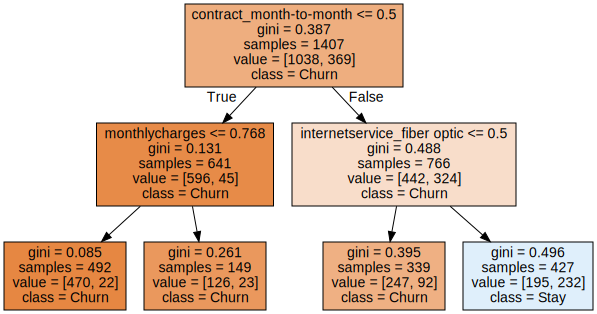

Max depth =3



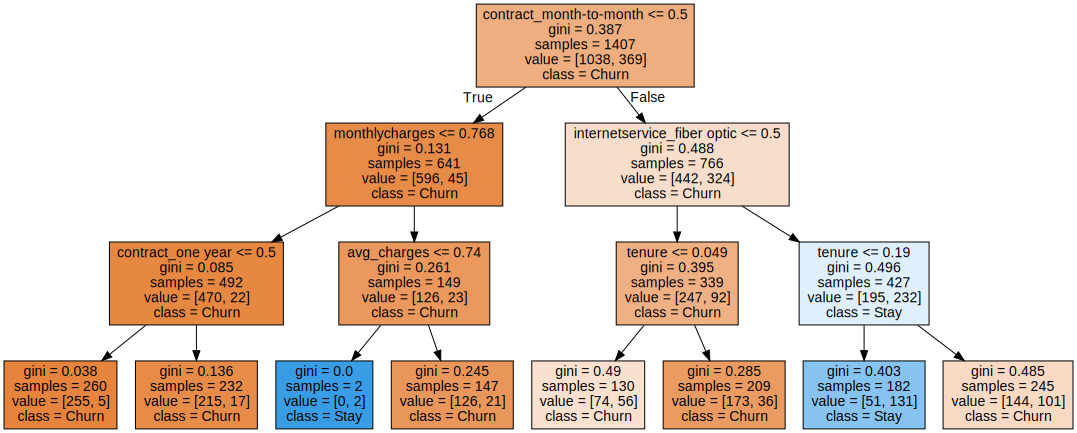

Max depth =4



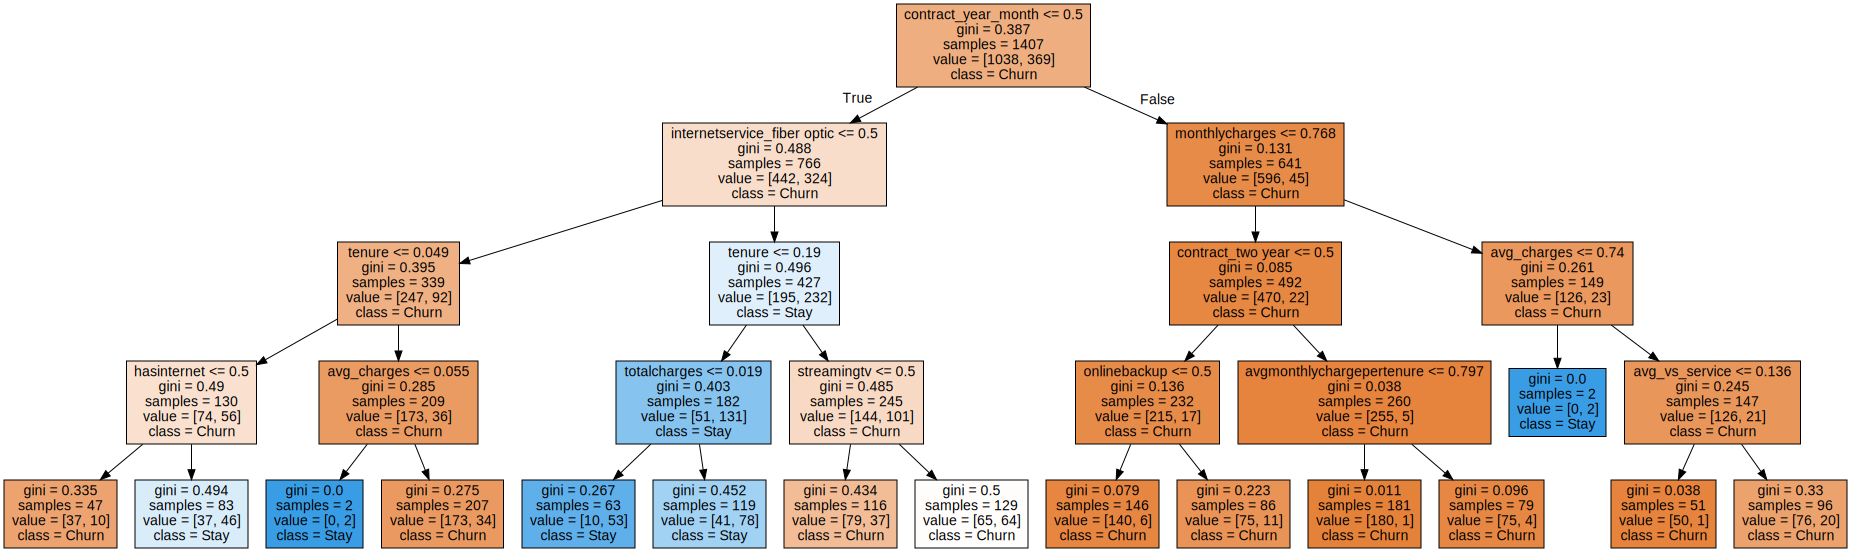

In [117]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

Tree_Max_Depths=[2,3,4]

output_tree=pd.DataFrame()

for i in Tree_Max_Depths:
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(x_test,y_test)
    y_test_pred_DecisionTree = clf.predict(x_test) 
    print('Max depth ={}\n'.format(i))
    plot_tree(clf, x_train.columns, ['Churn', 'Stay'])
    output_dec_tree = pd.DataFrame({'Churned_y_test':y_test, 'Churn_pred': y_test_pred_DecisionTree}) 
    output_dec_tree.to_csv('Churn_DecisionTree_Prediction.csv', index=False) 
    output_tree[i]=output_dec_tree['Churn_pred']
        
output_tree.rename(columns = {2:'y_test_predTree2', 3:'y_test_predTree3',4:'y_test_predTree4'}, inplace = True)

### K Nearest neighbors

In [118]:
from sklearn.neighbors import KNeighborsClassifier 
k_list=[*range(3, 16, 1)] #list of Ks for algorithm

outputknn = pd.DataFrame()  #blank df to insert results

for i in k_list:
    clf = KNeighborsClassifier(n_neighbors=i)        
    clf.fit(x_train, y_train)
    y_test_pred_Knn = clf.predict(x_test) 
    output = pd.DataFrame({'Churned_y_test':y_test, 'Churn_pred': y_test_pred_Knn}) 
    output.to_csv('my_Knn_Prediction.csv', index=False) 
    outputknn[i]=output['Churn_pred']    
    
outputknn['Churned_y_test']=y_test

outputknn.rename(columns = {3:'y_test_predKNN3', 4:'y_test_predKNN4',5:'y_test_predKNN5',
                           6:'y_test_predKNN6', 7:'y_test_predKNN7',8:'y_test_predKNN8',
                           9:'y_test_predKNN9', 10:'y_test_predKNN10',11:'y_test_predKNN11',
                           12:'y_test_predKNN12', 13:'y_test_predKNN13',14:'y_test_predKNN14',
                           15:'y_test_predKNN15'}, inplace = True)

### Random forest

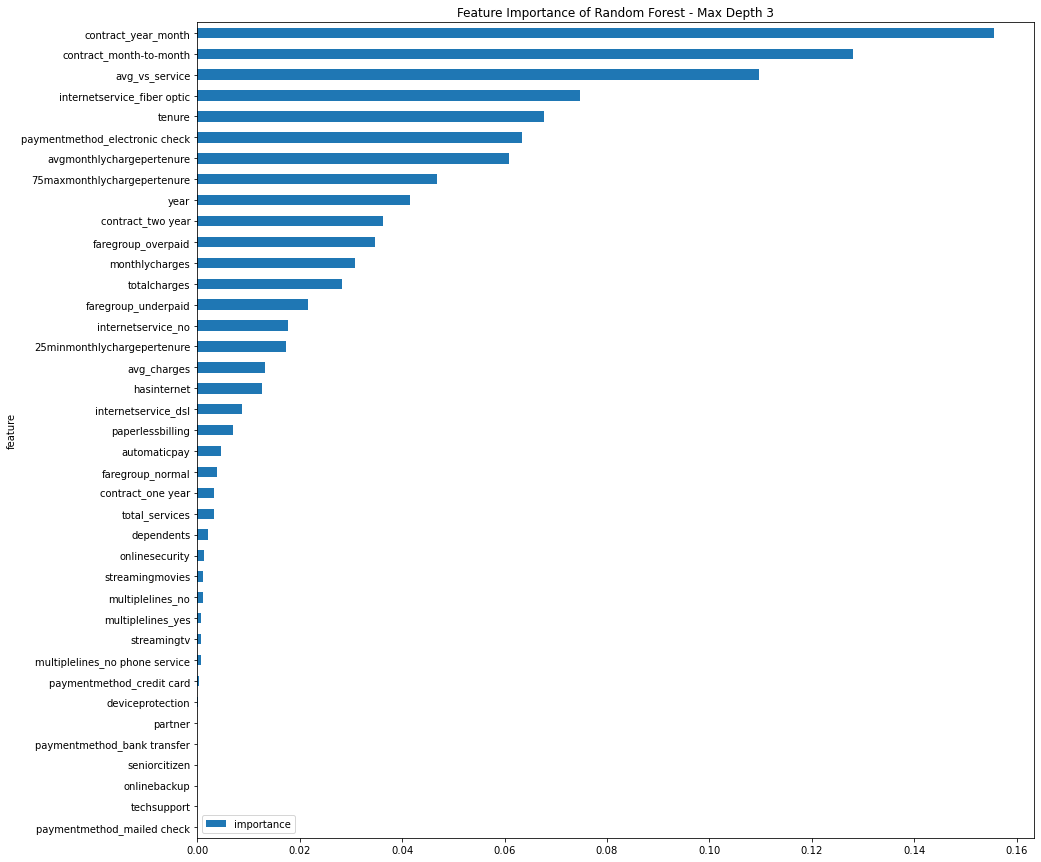

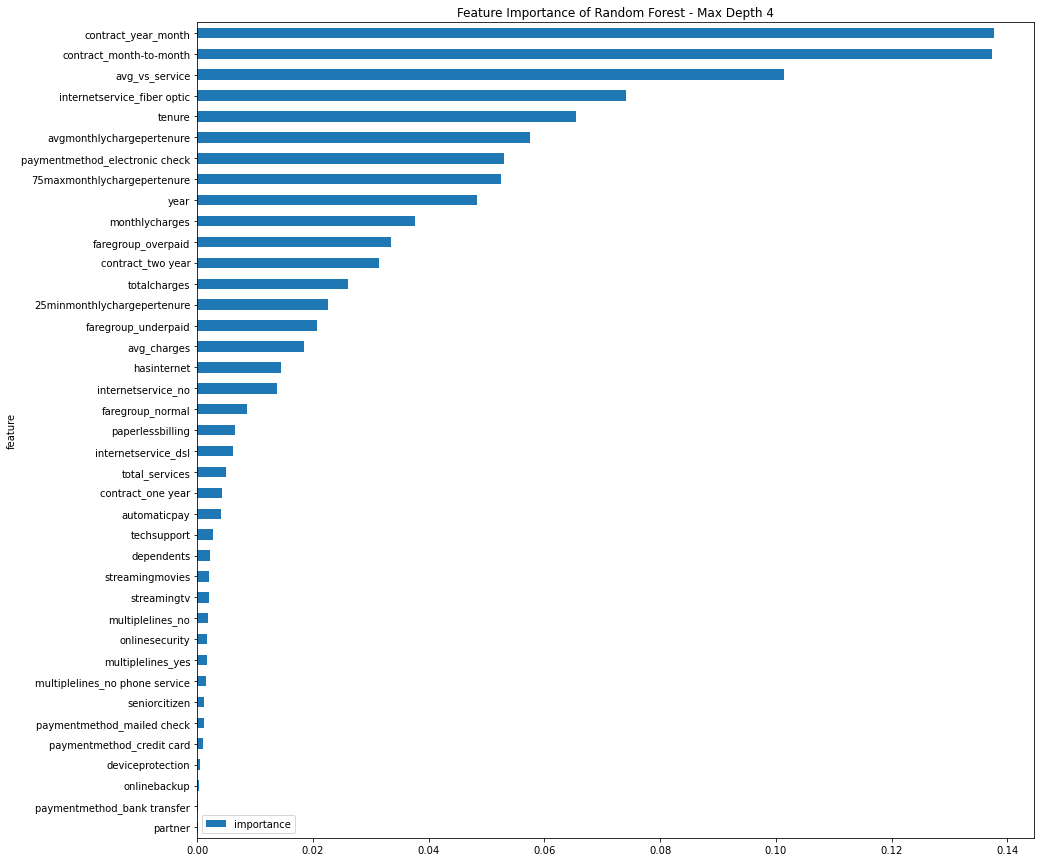

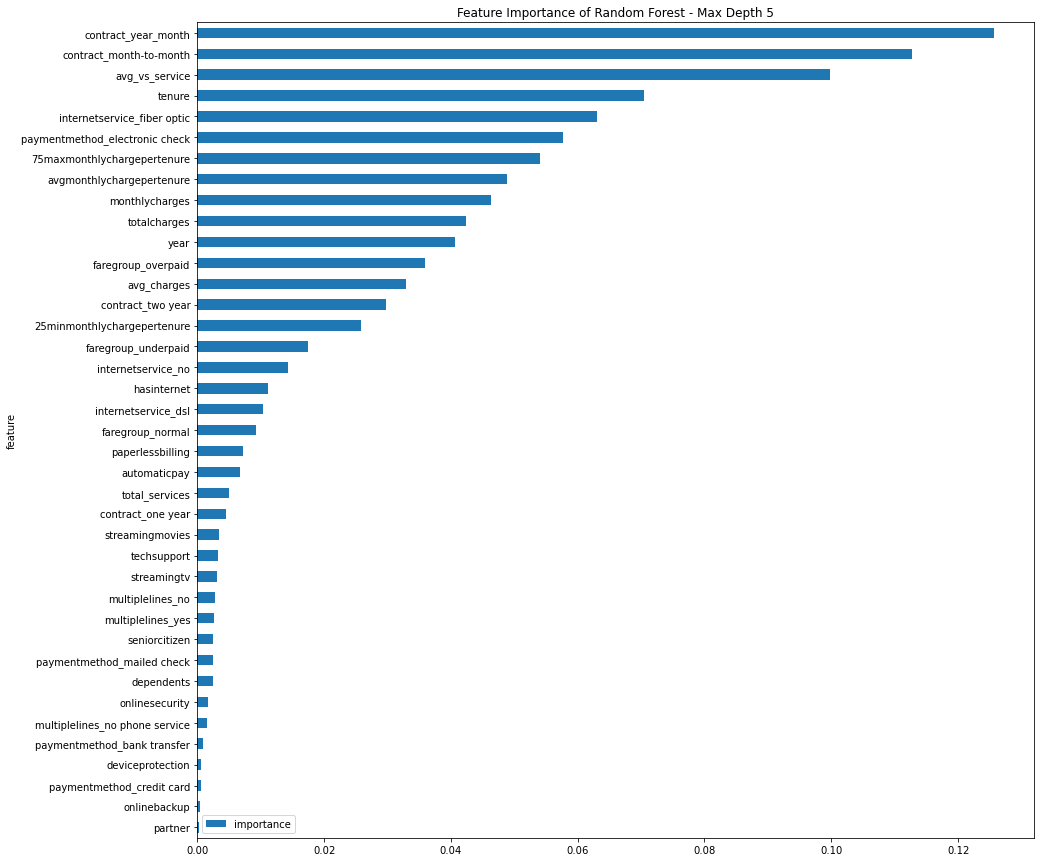

In [119]:
from sklearn.ensemble import RandomForestClassifier # Importing the algorithm

features = x_train.columns
RandFor=[3,4,5]
OutputRandFor=pd.DataFrame()
ran_for_feaure_importance=pd.DataFrame();

for i in RandFor:
    RanomForestAlg = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=1)
    # n_estimators = number of trees, defined 100 in instructions
    # max_depth = the maximum depth of the trees - we chose 2,3,4 similar to decition tree        
    RanomForestAlg.fit(x_train, y_train) # running\training the algorithm with the train data
    y_test_pred_RandomForest = RanomForestAlg.predict(x_test) # making a prediction based on "test" data features
    output = pd.DataFrame({'Churned_y_test':y_test, 'Churn_pred': y_test_pred_RandomForest}) # saving results to DataFrame
    OutputRandFor[i]=output['Churn_pred']
    
    ## feature importance
    #feature_importances = RanomForestAlg.feature_importances_
    #stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
    #stats.sort_values('importance', ascending=False,inplace=True) # Sorting the data frame
    #print('Feature importance for max depth of {}'.format(i))
    #display(stats)
    #print('\n')

    
OutputRandFor.rename(columns = {3:'y_test_predRandFor3', 4:'y_test_predRandFor4',5:'y_test_predRandFor5'}, inplace = True)
OutputRandFor
for i in RandFor:
    RanomForestAlg = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=1)
    # n_estimators = number of trees, defined 100 in instructions
    # max_depth = the maximum depth of the trees - we chose 2,3,4 similar to decition tree        
    RanomForestAlg.fit(x_train, y_train) # running\training the algorithm with the train data
    y_test_pred_RandomForest = RanomForestAlg.predict(x_test) # making a prediction based on "test" data features    
    ## feature importance
    feature_importances = RanomForestAlg.feature_importances_
    stats = pd.DataFrame({'feature':features, 'importance':feature_importances}) # creating the data frame
    stats_sort=stats.sort_values('importance', ascending=True) # Sorting the data frame
    ## Print feature importance
    stats_sort.plot(y='importance', x='feature', kind='barh',figsize=(15,15))
    plt.title(f'Feature Importance of Random Forest - Max Depth {i}');

### Result set:

In [120]:
results_set=pd.concat([OutputRandFor, outputknn, output_tree], axis=1)
from sklearn.metrics import accuracy_score
results_columns=results_set.columns
for i in results_columns:
    print('{} '.format(i))
    print(accuracy_score(y_test, results_set[i]))

y_test_predRandFor3 
0.7874911158493249
y_test_predRandFor4 
0.7931769722814499
y_test_predRandFor5 
0.7917555081734187
y_test_predKNN3 
0.757640369580668
y_test_predKNN4 
0.7647476901208244
y_test_predKNN5 
0.7562189054726368
y_test_predKNN6 
0.7611940298507462
y_test_predKNN7 
0.7711442786069652
y_test_predKNN8 
0.775408670931059
y_test_predKNN9 
0.7711442786069652
y_test_predKNN10 
0.7768301350390903
y_test_predKNN11 
0.7768301350390903
y_test_predKNN12 
0.7846481876332623
y_test_predKNN13 
0.7796730632551528
y_test_predKNN14 
0.7803837953091685
y_test_predKNN15 
0.7810945273631841
Churned_y_test 
1.0
y_test_predTree2 
0.7640369580668088
y_test_predTree3 
0.7960199004975125
y_test_predTree4 
0.8038379530916845


# Conclusion

Decision tree algorithm with max-depth of 4 shows best results in both runs. The 2nd run, after feature improvement shows a slight increase in the correlation in some instances